# Documentation

# Imports

In [100]:
print(f"==================")
print(f"Loading imports...")
import os
os.chdir(f"/home/disk/eos7/sressel/research/thesis-work/python/numerical_solver/")
import sys
import time
from glob import glob
import json
import numpy as np
import xarray as xr
import scipy as sp
from scipy import special
from scipy.signal import hilbert
from numpy.fft import fft, ifft, fftfreq

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':22})
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import matplotlib.gridspec as gs

from matplotlib.animation import FuncAnimation
from tqdm import tqdm

# # Cartopy
# from cartopy import crs as ccrs
# from cartopy import feature as cf
# from cartopy import util as cutil
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter, LongitudeLocator, LatitudeLocator

# Auxiliary Functions
import sys
sys.path.insert(0, '/home/disk/eos7/sressel/research/thesis-work/python/auxiliary_functions/')
import ipynb.fs.full.mjo_mean_state_diagnostics as mjo
from ipynb.fs.full.bmh_colors import bmh_colors
from ipynb.fs.full.rounding_functions import round_out, round_to_multiple
from ipynb.fs.full.modified_colormap import Ahmed21_colormap

Ahmed_cmap = Ahmed21_colormap()
from ipynb.fs.full.tapering_functions import taper_meridionally, fringe_region_damping_function
from ipynb.fs.full.perlin_noise import generate_perlin_noise_2d
from ipynb.fs.full.normalize_data import normalize_data

sys.path.insert(0, '/home/disk/eos7/sressel/research/thesis-work/python/numerical_solver/')
from ipynb.fs.full.numerical_solver_plotting_functions import plot_horizontal_structure, animate_horizontal_structure

# import obspy
print(f"Imports Loaded")
print(f"==================")

Loading imports...
Imports Loaded


# Auxiliary functions

In [101]:
def day_to_index(day):
    return np.abs(downsampled_timepoints/SECONDS_PER_DAY - day).argmin()

# Assign experiment IDs

In [102]:
with open(f"./experiments_table.json", 'r') as json_file:
    experiments_table = json.load(json_file)

#### Note - bmh_colors >= 12 aren't great for plots
experiment_colors = {
    'Ahmed-21' : bmh_colors('blue'),
    'Gaussian Mean Moisture' : bmh_colors('red'),
    'Variable Moisture Sensitivity' : bmh_colors('purple'),
    'No Temperature Sensitivity' : bmh_colors('green'),
    'Asymmetric Gaussian Mean Moisture' : bmh_colors('blue'),
    'Asymmetric Variable Moisture Sensitivity' : bmh_colors(6),
    'Asymmetric No Temperature Sensitivity' : bmh_colors(7),
    'Variable Convective Sensitivities' : bmh_colors(8),
    # 'Equal Convective Sensitivities' : bmh_colors(9),
    'Variable Quadratic' : 'lime',
    'Equal Convective Sensitivities' : 'goldenrod',
    'Reduced Temperature Sensitivity' : bmh_colors(10),
    'Reduced Moisture Sensitivity' : bmh_colors(11),
    'Doubled sigma_x' : 'purple',
    'Wide Sensitivity' : 'purple',
    'Variable r' : 'purple',
    'Variable Mq' : 'magenta',
    'Wide Mean State - Long' : 'green',
    'Wide Mean State' : 'green',
    'Narrow Mean State' : 'blue',
    'Wide Mean State - No Temperature Sensitivity' : 'cyan',
    'Narrow Mean State - No Temperature Sensitivity' : 'goldenrod',
    'Narrow Mean State - Variable r' : 'papayawhip',
    'Indian Ocean' : 'lime',
    'Maritime Continent' : 'aquamarine',
    'Western Pacific' : 'darkslategray',
    'Test Long' : 'mint',
    'Wang and Sobel' : 'mint',
    "Variable Mq - Normal Sensitivity - Double Zonal Advection" : 'green',
    "Variable Mq - Normal Sensitivity - Double Zonal Advection - Rayleigh Friction" : 'cyan',
    "Variable sigma_x" : "darkblue", 
    "No Meridional Wind" : "darkblue",
    "No Meridional Wind - Zonally Variable Zonal Advection 0 to 1 - No Temperature Sensitivity" : 'green',
    "No Meridional Wind - Zonally Variable Zonal Advection -1 to 1 - No Temperature Sensitivity" : 'blue',
    "Base Gaussian - Zonally Variable Zonal Advection -1 to 1" : bmh_colors(1)
    
    
    # 'k-scaled Initial Condition' : bmh_colors('orange'),
    # 'Quadratic-No Temperature Sensitivity' : bmh_colors(6)
}

# Compare across wavenumbers

## Specify and load experiment data

In [104]:
save_timestamp = False
print(f"{'Single experiment data':^50}")
print(f"{'':{'='}^{50}}")

#### Specify experiment to load
# experiment_to_load = 'Extended Quadratic Mean Moisture'
# experiment_to_load = 'Ahmed-21'
# experiment_to_load = 'Gaussian Mean Moisture'
# experiment_to_load = "Symmetric Grid Gaussian Mean Moisture"
# experiment_to_load = 'Asymmetric Gaussian Mean Moisture'
# experiment_to_load = 'Variable Moisture Sensitivity'
# experiment_to_load = 'Asymmetric Variable Moisture Sensitivity'
# experiment_to_load = 'Variable Convective Sensitivities'
# experiment_to_load = 'Equal Convective Sensitivities'
# experiment_to_load = 'No Temperature Sensitivity'
# experiment_to_load = 'Asymmetric No Temperature Sensitivity'
# experiment_to_load = 'Quadratic Rayleigh Friction'
# experiment_to_load = 'Narrow Sensitivity'
# experiment_to_load = 'Wide Sensitivity'
# experiment_to_load = 'Variable r'
# experiment_to_load = 'Variable Mq'
# experiment_to_load = 'Narrow Mean State'
# experiment_to_load = 'Wide Mean State - Long'
# experiment_to_load = 'Narrow Mean State - Variable r'
# experiment_to_load = 'Indian Ocean'
# experiment_to_load = 'Maritime Continent'
# experiment_to_load = 'Western Pacific'
# experiment_to_load = 'No Meridional Advection'/
# experiment_to_load = 'Test Long Extended'
# experiment_to_load = 'Wang and Sobel'
# experiment_to_load = "Variable Mq - Normal Sensitivity - Double Zonal Advection"
# experiment_to_load = "Variable Mq - Normal Sensitivity - Double Zonal Advection - Rayleigh Friction"
# experiment_to_load = "Variable Mq - Low Moisture Sensitivity - Double Zonal Advection - Rayleigh Friction"
# experiment_to_load = 'Meridionally Variable Zonal Advection'
# experiment_to_load = "No Meridional Wind"
# experiment_to_load = "No Meridional Wind - Zonally Variable Zonal Advection"
# experiment_to_load = "Base Gaussian - Zonally Variable Zonal Advection -1 to 1",
# experiment_to_load = "No Meridional Wind - Zonally Variable Zonal Advection -1 to 1 - No Temperature Sensitivity"
# experiment_to_load = "Unfiltered - No Meridional Wind"
# experiment_to_load = "Unfiltered - No Meridional Wind - Zonally Variable Zonal Advection 0 to 1"
experiment_to_load = "Free Dry"
print(f"Experiment: {experiment_to_load}")
print(f"{'':{'='}^{50}}")
specified_output_file_directory = f"output/Ahmed-21/{experiments_table[experiment_to_load]}"
specified_m = 1
specified_wave_type = 'Kelvin'

#### Specify initial conditions to load
initial_conditions_to_load = [
    f"k=1.0_m={specified_m}_{specified_wave_type}-wave", 
    f"k=2.0_m={specified_m}_{specified_wave_type}-wave", 
    f"k=3.0_m={specified_m}_{specified_wave_type}-wave", 
    f"k=4.0_m={specified_m}_{specified_wave_type}-wave",
    f"k=5.0_m={specified_m}_{specified_wave_type}-wave",
    f"k=6.0_m={specified_m}_{specified_wave_type}-wave", 
]
initial_condition_type = initial_conditions_to_load[0].split('_')[-1]

#### Load experiment variables
print("---- Loading experiment parameters...")
with open(
    f"{specified_output_file_directory}/experiment_variables.json", 'r') as json_file:
    loaded_experiment_variables = json.load(json_file)

simulation_moisture = loaded_experiment_variables['simulation_moisture']
moisture_advection = loaded_experiment_variables['moisture_advection']
simulation_damping = loaded_experiment_variables['simulation_damping']
moisture_coupling = loaded_experiment_variables['moisture_coupling']
simulation_diffusion = loaded_experiment_variables['simulation_diffusion']
fringe_region = loaded_experiment_variables['fringe_region']
moisture_sensitivity_structure = loaded_experiment_variables['moisture_sensitivity_structure']
temperature_sensitivity_structure = loaded_experiment_variables['temperature_sensitivity_structure']
# sensitivity_limit = loaded_experiment_variables['sensitivity_limit']
# sensitivity_width = loaded_experiment_variables['sensitivity_width']
mean_moisture_profile = loaded_experiment_variables['mean_moisture_profile']
gaussian_length_scale = loaded_experiment_variables['moisture_length_scale']
GRAVITY = loaded_experiment_variables['GRAVITY']
EQUIVALENT_DEPTH = loaded_experiment_variables['EQUIVALENT_DEPTH']
CORIOLIS_PARAMETER = loaded_experiment_variables['CORIOLIS_PARAMETER']
EARTH_RADIUS = loaded_experiment_variables['EARTH_RADIUS']
AIR_DENSITY = loaded_experiment_variables['AIR_DENSITY']
WATER_DENSITY = loaded_experiment_variables['WATER_DENSITY']
LATENT_HEAT = loaded_experiment_variables['LATENT_HEAT']
SPECIFIC_HEAT = loaded_experiment_variables['SPECIFIC_HEAT']
DIFFUSIVITY = loaded_experiment_variables['DIFFUSIVITY']
METERS_PER_DEGREE = loaded_experiment_variables['METERS_PER_DEGREE']
SECONDS_PER_DAY = loaded_experiment_variables['SECONDS_PER_DAY']
COLUMN_AVERAGE_MASS = loaded_experiment_variables['COLUMN_AVERAGE_MASS']
GROSS_DRY_STABILITY = loaded_experiment_variables['GROSS_DRY_STABILITY']
MOISTURE_SENSITIVITY = loaded_experiment_variables['MOISTURE_SENSITIVITY']
TEMPERATURE_SENSITIVITY = loaded_experiment_variables['TEMPERATURE_SENSITIVITY']
if (experiment_to_load == 'Variable r') or (experiment_to_load == 'Narrow Mean State - Variable r'):
    k = np.arange(1,7)
    CLOUD_RADIATIVE_PARAMETER = 0.21*np.exp(-242614*k/EARTH_RADIUS)
    # print(f"Variable r = {CLOUD_RADIATIVE_PARAMETER:0.2f}")
else:
    CLOUD_RADIATIVE_PARAMETER = loaded_experiment_variables['CLOUD_RADIATIVE_PARAMETER']
# RAYLEIGH_FRICTION_COEFFICIENT = loaded_experiment_variables['RAYLEIGH_FRICTION_COEFFICIENT']
sigma_x_multiplier = loaded_experiment_variables['sigma_x_multiplier']
sigma_y_multiplier = loaded_experiment_variables['sigma_y_multiplier']
ZONAL_MOISTENING_PARAMETER = loaded_experiment_variables['ZONAL_MOISTENING_PARAMETER']
MERIDIONAL_MOISTENING_PARAMETER = loaded_experiment_variables['MERIDIONAL_MOISTENING_PARAMETER']
MERIDIONAL_OFFSET_PARAMETER = loaded_experiment_variables['MERIDIONAL_OFFSET_PARAMETER']
gravity_wave_phase_speed = loaded_experiment_variables['gravity_wave_phase_speed']
time_scale = loaded_experiment_variables['time_scale']
length_scale = loaded_experiment_variables['length_scale']
gross_moisture_stratification = loaded_experiment_variables['gross_moisture_stratification']
effective_sensitivity = loaded_experiment_variables['effective_sensitivity']
effective_gross_moist_stability = loaded_experiment_variables['effective_gross_moist_stability']
scaled_zonal_parameter = loaded_experiment_variables['scaled_zonal_parameter']
scaled_meridional_parameter = loaded_experiment_variables['scaled_meridional_parameter']
n_days = loaded_experiment_variables['n_days']
n_chunks = loaded_experiment_variables['n_chunks']
n_time_steps = loaded_experiment_variables['n_time_steps']
meridional_domain_length = loaded_experiment_variables['meridional_domain_length']
zonal_domain_length = loaded_experiment_variables['zonal_domain_length']
nt = loaded_experiment_variables['nt']    
nx = loaded_experiment_variables['nx']
ny = loaded_experiment_variables['ny']
zonal_grid_spacing = loaded_experiment_variables['zonal_grid_spacing']
meridional_grid_spacing = loaded_experiment_variables['meridional_grid_spacing']
simulation_length = loaded_experiment_variables['simulation_length']
time_step = loaded_experiment_variables['time_step']
zonal_step_size = loaded_experiment_variables['zonal_step_size']
meridional_step_size = loaded_experiment_variables['meridional_step_size']
CFL_x = loaded_experiment_variables['CFL_x']
CFL_y = loaded_experiment_variables['CFL_y']
fringe_region_latitude = loaded_experiment_variables['fringe_region_latitude']
fringe_region_width = loaded_experiment_variables['fringe_region_width']
fringe_region_strength = loaded_experiment_variables['fringe_region_strength']
grid_scaling = loaded_experiment_variables['grid_scaling']
additional_notes = loaded_experiment_variables['additional_notes']
simulation_name = loaded_experiment_variables['simulation_name']
output_file_directory = loaded_experiment_variables['output_file_directory']
# n_rk_steps = loaded_experiment_variables['n_rk_steps']
# save_downsampled = loaded_experiment_variables['save_downsampled']
zonal_wavenumber      = 2*np.pi*fftfreq(nx, zonal_step_size)       # zonal wavenumbers
meridional_wavenumber = 2*np.pi*fftfreq(ny, meridional_step_size)  # meridional wavenumbers
frequencies           = 2*np.pi*fftfreq(nt, time_step)             # frequencies

print("---- Experiment parameters loaded")
# print(f"{'':{'='}^{50}}")

#### Load a dataset to get the x,y, and time grids
print("---- Loading experiment grid...")
downsampled_data = xr.load_dataset(
    f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/"
    + f"{initial_conditions_to_load[0]}" 
    + f"_downsampled-model-data_compiled.nc"
)

downsampled_timepoints = downsampled_data['time'].values
output_zonal_gridpoints = downsampled_data['x'].values
output_meridional_gridpoints = downsampled_data['y'].values
print("---- Experiment grid loaded")

# Create a folder to save figures
# print(f"{'':{'='}^{50}}")
print("---- Creating figures folder...")
if not os.path.exists(f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/figures/"):
    os.system(f"mkdir {specified_output_file_directory}/{initial_condition_type}_initial-condition/figures/")
    print("---- Figures folder created")
    
else: 
    print("---- Figures folder exists")
print(f"{'':{'='}^{50}}")

print(f"{'Experiment data loaded':^50}")
print(f"{'':{'='}^{50}}")

              Single experiment data              
Experiment: Free Dry
---- Loading experiment parameters...
---- Experiment parameters loaded
---- Loading experiment grid...
---- Experiment grid loaded
---- Creating figures folder...
---- Figures folder exists
              Experiment data loaded              


### Load field variables

In [105]:
multi_scale_output_variables = xr.Dataset(
    data_vars=dict(
        u=(["k", "time", "y", "x"], np.empty((6, len(downsampled_timepoints), ny, nx))),
        v=(["k", "time", "y", "x"], np.empty((6, len(downsampled_timepoints), ny, nx))),
        T=(["k", "time", "y", "x"], np.empty((6, len(downsampled_timepoints), ny, nx))),
        q=(["k", "time", "y", "x"], np.empty((6, len(downsampled_timepoints), ny, nx))),
    ), 
    coords=dict(
        k=[1,2,3,4,5,6], 
        time=downsampled_timepoints,
        y=output_meridional_gridpoints,
        x=output_zonal_gridpoints
    ), 
)

print("Loading field variables...")
print(f"{'':{'='}^{50}}")
for index, initial_condition in enumerate(initial_conditions_to_load):
    print(
        f"---- Initial condition: {initial_condition.split('_')[0]}, {initial_condition.split('_')[1]}, {initial_condition.split('_')[2]}"
    )
    loaded_output_data = xr.load_dataset(
        f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/"
        + f"{initial_condition}" 
        + f"_downsampled-model-data_compiled.nc"
        )

    for field_variable in multi_scale_output_variables.data_vars:
            multi_scale_output_variables[field_variable][index] = loaded_output_data[field_variable]

print(f"{'':{'='}^{50}}")
print("Field variables loaded")

Loading field variables...
---- Initial condition: k=1.0, m=1, Kelvin-wave
---- Initial condition: k=2.0, m=1, Kelvin-wave
---- Initial condition: k=3.0, m=1, Kelvin-wave
---- Initial condition: k=4.0, m=1, Kelvin-wave
---- Initial condition: k=5.0, m=1, Kelvin-wave
---- Initial condition: k=6.0, m=1, Kelvin-wave
Field variables loaded


### Load data metrics

In [70]:
#### Initialize data metric arrays
print("Loading data metrics...")
multi_scale_growth_budgets = xr.Dataset(
    data_vars=dict(
        growth=(["k", "time"], np.empty((6, len(downsampled_timepoints)))),
        omega=(["k", "time"], np.empty((6, len(downsampled_timepoints)))),
        u=(["k", "time"], np.empty((6, len(downsampled_timepoints)))),
        v=(["k", "time"], np.empty((6, len(downsampled_timepoints)))),
        Qr=(["k", "time"], np.empty((6, len(downsampled_timepoints)))),
        D=(["k", "time"], np.empty((6, len(downsampled_timepoints)))),
        residual=(["k", "time"], np.empty((6, len(downsampled_timepoints)))),
), 
    coords=dict(
        k=[1,2,3,4,5,6], 
        time=downsampled_timepoints
    ), 
    attrs = {'Latitude Bounds':(None, None)}
)

multi_scale_propagation_budgets = xr.Dataset(
    data_vars=dict(
        propagation=(["k", "time"], np.empty((6, len(downsampled_timepoints)))),
        omega=(["k", "time"], np.empty((6, len(downsampled_timepoints)))),
        u=(["k", "time"], np.empty((6, len(downsampled_timepoints)))),
        v=(["k", "time"], np.empty((6, len(downsampled_timepoints)))),
        Qr=(["k", "time"], np.empty((6, len(downsampled_timepoints)))),
        D=(["k", "time"], np.empty((6, len(downsampled_timepoints)))),
        residual=(["k", "time"], np.empty((6, len(downsampled_timepoints)))),
), 
    coords=dict(
        k=[1,2,3,4,5,6], 
        time=downsampled_timepoints
    ), 
    attrs = {'Latitude Bounds':(None, None)}
)

multi_scale_phase_speeds = xr.DataArray(
    None, 
    coords=dict(k=[1,2,3,4,5,6], time=downsampled_timepoints), 
    dims=("k", "time"),
    attrs = {'Latitude Bounds':(None, None)}
)

multi_scale_pattern_correlations = xr.DataArray(
    None, 
    coords=dict(k=[1,2,3,4,5,6], time=downsampled_timepoints), 
    dims=("k", "time"),
    attrs = {'Latitude Bounds':(None, None)}
)

budget_south_bound = -90
budget_north_bound = 90

correlation_south_bound = -90
correlation_north_bound = 90

for index, initial_condition in enumerate(initial_conditions_to_load):
    print(f"---- Initial condition: {initial_condition}")
    for budget_variable in multi_scale_growth_budgets.data_vars:
        # Load the growth budget dataset for the current initial condition
        loaded_growth_budget = xr.load_dataset(
            f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/"
            + f"{initial_condition}_MSE-growth-budget"
            + f"_{mjo.tick_labeller([budget_south_bound], 'lat', False)[0]}-{mjo.tick_labeller([budget_north_bound], 'lat', False)[0]}.nc"
            )

        # Assign the loaded growth budget to the initialized dataset
        multi_scale_growth_budgets[budget_variable][index] = loaded_growth_budget[budget_variable]
        multi_scale_growth_budgets.attrs['Latitude Bounds'] = loaded_growth_budget.attrs['Latitude Bounds']
        
    for budget_variable in multi_scale_propagation_budgets.data_vars:
        # Load the propagation budget dataset for the current initial condition
        loaded_propagation_budget = xr.load_dataset(
            f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/"
            + f"{initial_condition}_MSE-propagation-budget"
            + f"_{mjo.tick_labeller([budget_south_bound], 'lat', False)[0]}-{mjo.tick_labeller([budget_north_bound], 'lat', False)[0]}.nc"
            )

        # Assign the loaded propagation budget to the initialized dataset
        multi_scale_propagation_budgets[budget_variable][index] = loaded_propagation_budget[budget_variable]
        multi_scale_propagation_budgets.attrs['Latitude Bounds'] = loaded_propagation_budget.attrs['Latitude Bounds']

    # Load the phase speeds dataarray for the current initial condition
    loaded_phase_speeds = xr.load_dataarray(
        f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/"
        + f"{initial_condition}_instantaneous-phase-speed"
        + f"_{mjo.tick_labeller([correlation_south_bound], 'lat', False)[0]}-{mjo.tick_labeller([correlation_north_bound], 'lat', False)[0]}.nc"
        )

    # Assign the loaded phase speeds to the initialized dataarray
    multi_scale_phase_speeds[index] = loaded_phase_speeds
    multi_scale_phase_speeds.attrs['Latitude Bounds'] = loaded_phase_speeds.attrs['Latitude Bounds']

    # Load the pattern correlations dataarray for the current initial condition
    loaded_pattern_correlations = xr.load_dataarray(
        f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/"
        + f"{initial_condition}_pattern-correlation"
        + f"_{mjo.tick_labeller([correlation_south_bound], 'lat', False)[0]}-{mjo.tick_labeller([correlation_north_bound], 'lat', False)[0]}.nc"
        )

    # Assign the loaded pattern correlations to the initialized dataarray
    multi_scale_pattern_correlations[index] = loaded_pattern_correlations
    multi_scale_pattern_correlations.attrs['Latitude Bounds'] = loaded_pattern_correlations.attrs['Latitude Bounds']

print("Data metrics loaded")
print(f"{'':{'='}^{50}}")

Loading data metrics...
---- Initial condition: k=1.0_m=1_Kelvin-wave
---- Initial condition: k=2.0_m=1_Kelvin-wave
---- Initial condition: k=3.0_m=1_Kelvin-wave
---- Initial condition: k=4.0_m=1_Kelvin-wave
---- Initial condition: k=5.0_m=1_Kelvin-wave
---- Initial condition: k=6.0_m=1_Kelvin-wave
Data metrics loaded


## Plot field variable horizontal structure over time

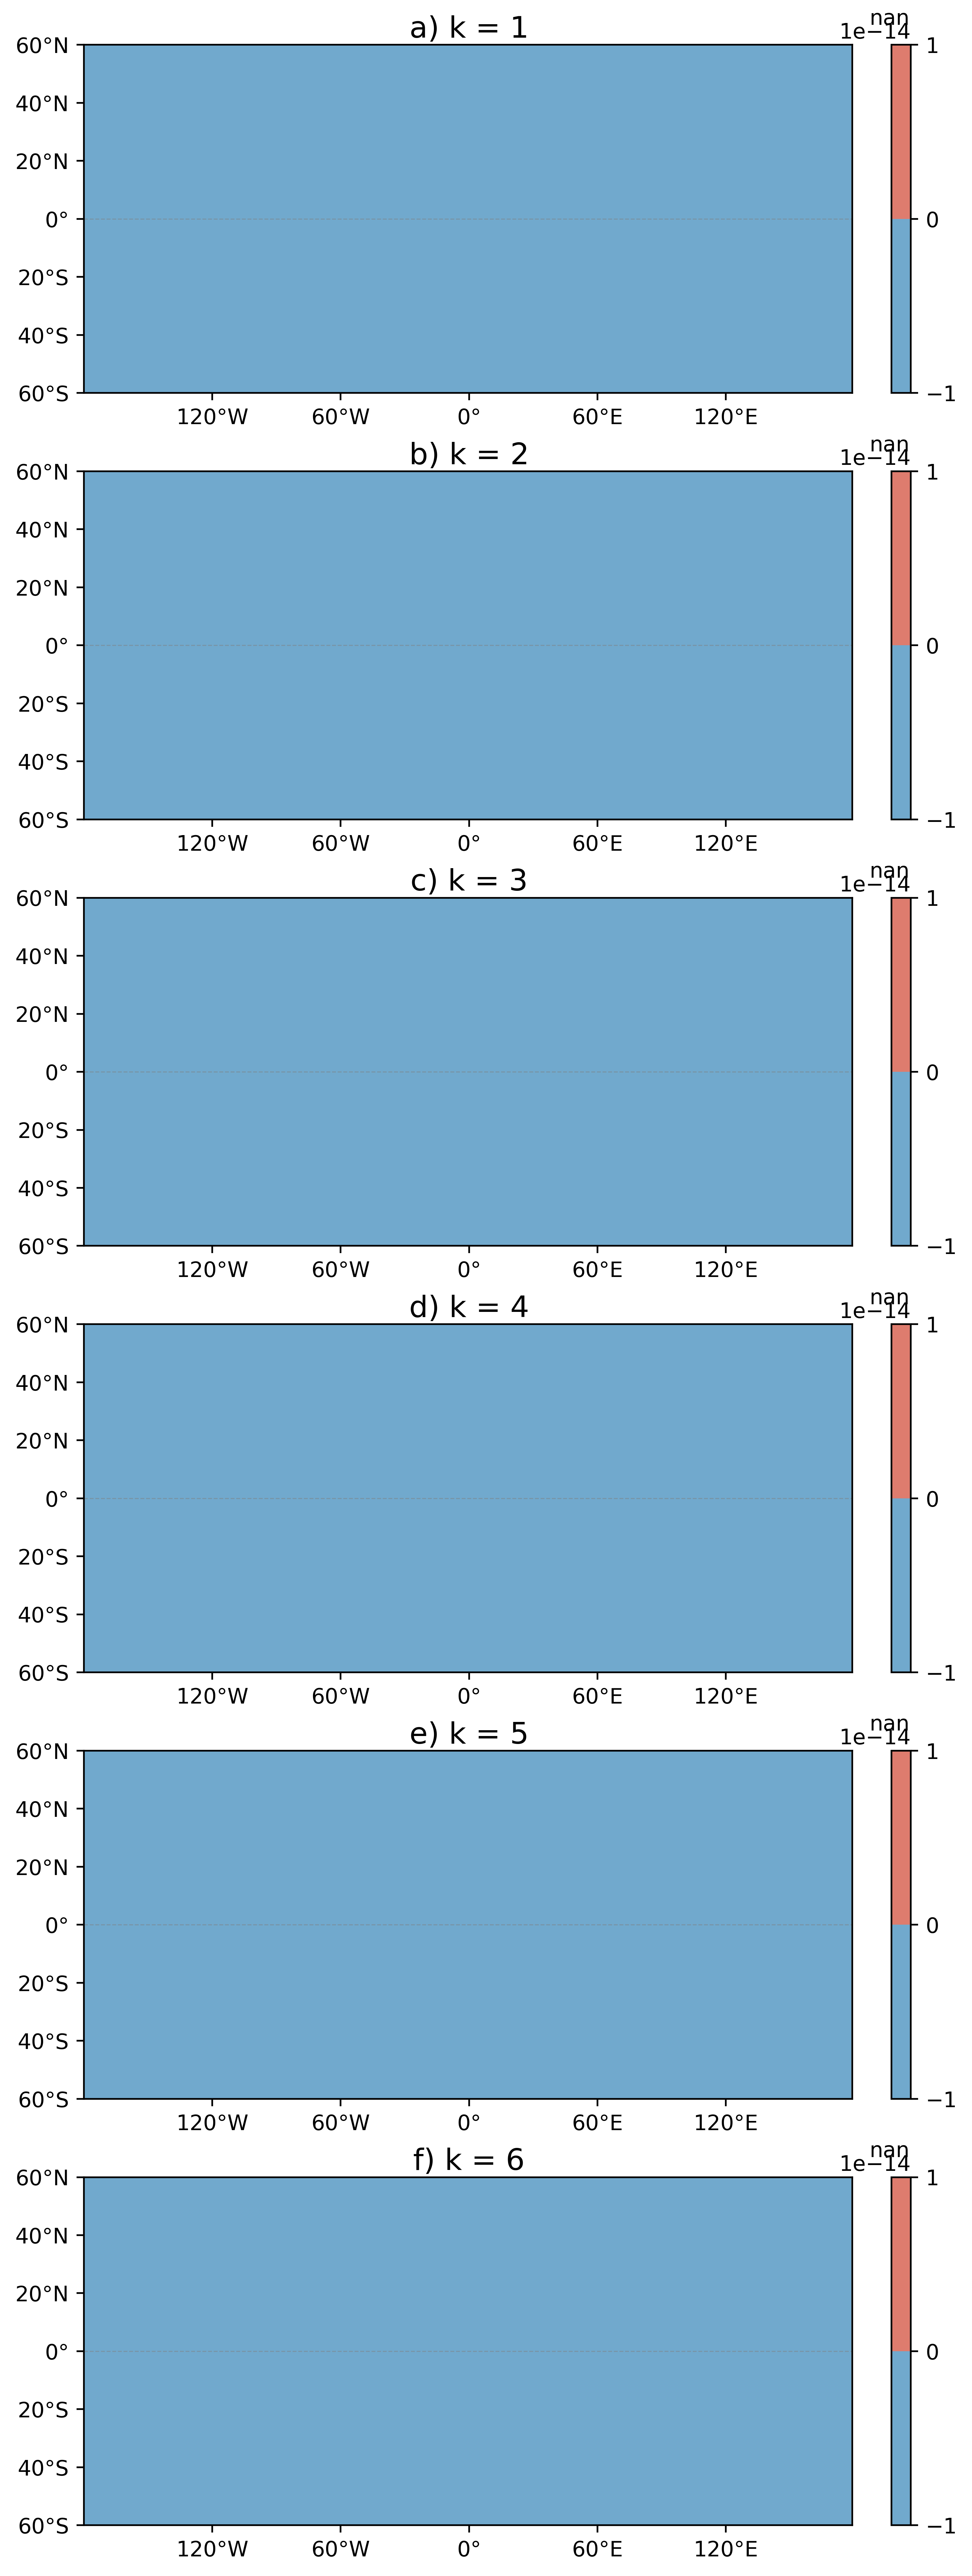

In [107]:
plt.style.use('default')
fig = plt.figure(figsize=(6, 18), dpi=500)
gs_main = gs.GridSpec(6, 2, width_ratios=[40,1], figure=fig)
gs_main.update(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.225, wspace=0.1)
# fig.suptitle(t=f"{experiment_to_load} case", x=0.5, y=0.965)

# day = 360
day = 30

plot_labels = [
    "a) k = 1",
    "b) k = 2",
    "c) k = 3",
    "d) k = 4",
    "e) k = 5",
    "f) k = 6",
]

ax = []
cbar_ax = []
# for row_index, k in enumerate([1,2,3,4,5,6]):
for row_index, k in enumerate([1,2,3,4,5,6]):

    # precipitation = (
    #     moisture_sensitivity_array * multi_scale_output_variables['q'] 
    #     - temperature_sensitivity_array * multi_scale_output_variables['T']
    # )
    # xlims = (-180/k+30/k, 180/k+30/k)
    # xlims = (-180/k, 180/k)
    # ylims = (-35, 35)
    # ylims = (-31, 31)

    xlims = (-180, 180)
    ylims = (-60, 60)
    
    ax.append(fig.add_subplot(gs_main[row_index,0]))
    cbar_ax.append(fig.add_subplot(gs_main[row_index,1]))

    # scaling_factor = 1/np.max(multi_scale_output_variables['q'].sel(k=k).isel(time=day_to_index(day)))
    scaling_factor = 1
    scaled_q = scaling_factor*multi_scale_output_variables['q'].sel(k=k).isel(time=day_to_index(day))
    scaled_T = scaling_factor*multi_scale_output_variables['T'].sel(k=k).isel(time=day_to_index(day))
    scaled_u = scaling_factor*multi_scale_output_variables['u'].sel(k=k).isel(time=day_to_index(day))
    scaled_v = scaling_factor*multi_scale_output_variables['v'].sel(k=k).isel(time=day_to_index(day))
    # scaled_P = scaling_factor*precipitation.sel(k=k).isel(time=day_to_index(day))
    
    # moisture_zonal_argmax = np.argmax(scaled_q.sel(y=12*METERS_PER_DEGREE, method='nearest').values)
    [argy, argx] = np.unravel_index(np.argmax(scaled_q.values), [ny, nx])
    shift_value = -argx + nx//2
    # shift_value = 0
    
    CF = ax[row_index].contourf(
        output_zonal_gridpoints*grid_scaling,
        output_meridional_gridpoints*grid_scaling,
        np.roll(scaled_q, shift=shift_value, axis=1),
        cmap=Ahmed_cmap,
        norm=mcolors.CenteredNorm(vcenter=0),
        levels=21
    )
    cbar = plt.colorbar(CF, cax=cbar_ax[row_index])


    T_levels = np.delete(np.linspace(-1.1*np.max(np.abs(scaled_T)), 1.1*np.max(np.abs(scaled_T)), 11), [5])
    CS = ax[row_index].contour(
        output_zonal_gridpoints*grid_scaling,
        output_meridional_gridpoints*grid_scaling,
        np.roll(scaled_T, shift=shift_value, axis=1),
        # levels=T_levels,
        colors='k',
        alpha=0.9
    )
    ax[row_index].clabel(CS, CS.levels, inline=True, fontsize=8, colors='k')

    # P_levels = np.delete(np.linspace(-1.1*np.max(np.abs(scaled_P)), 1.1*np.max(np.abs(scaled_P)), 11), [5])
    # CS_P = ax[row_index].contour(
    #     output_zonal_gridpoints*grid_scaling,
    #     output_meridional_gridpoints*grid_scaling,
    #     np.roll(scaled_P, shift=shift_value, axis=1),
    #     levels=P_levels,
    #     colors='magenta',
    #     alpha=0.9
    # )
    # ax[row_index].clabel(CS_P, CS_P.levels, inline=True, fontsize=8, colors='magenta')

    # Find the indices of the left and right bounds of the plot 
    left_bound_index = np.abs(output_zonal_gridpoints/METERS_PER_DEGREE - xlims[0]).argmin()
    right_bound_index = np.abs(output_zonal_gridpoints/METERS_PER_DEGREE - xlims[1]).argmin()

    # Calculate the skip number necessary to give 'zonal_quiver_points' number of points
    n_skip_zonal = int(len(output_zonal_gridpoints[left_bound_index:right_bound_index])/(16))

    # Find the indices of the bottom and top bounds of the plot 
    bottom_bound_index = np.abs(output_meridional_gridpoints/METERS_PER_DEGREE - ylims[0]).argmin()
    top_bound_index = np.abs(output_meridional_gridpoints/METERS_PER_DEGREE - ylims[1]).argmin()

    # Calculate the skip number necessary to give 'meridional_quiver_points' number of points
    n_skip_meridional = int(len(output_meridional_gridpoints[bottom_bound_index:top_bound_index])/(17))
    
    quiv_scale = np.max(np.abs(scaled_u.values))
    quiv = ax[row_index].quiver(
        output_zonal_gridpoints[::n_skip_zonal]*grid_scaling,
        output_meridional_gridpoints[::n_skip_meridional]*grid_scaling,
        np.roll(-scaled_u, shift=shift_value, axis=1)[::n_skip_meridional,::n_skip_zonal],
        np.roll(-scaled_v, shift=shift_value, axis=1)[::n_skip_meridional,::n_skip_zonal],
        scale_units = 'xy',
        scale = quiv_scale,
        width=0.003
    )

    key_length = (2*quiv_scale)*(xlims[1]-xlims[0])/360
    key_label = f"{360/(xlims[1]-xlims[0])*(2*quiv_scale):.2e}"
            
    ax[row_index].quiverkey(
        quiv,            
        xlims[1]*METERS_PER_DEGREE*grid_scaling, 1.15*(ylims[1]*METERS_PER_DEGREE*grid_scaling), 
        U=key_length,
        label=key_label,
        labelpos='E',          
        color='black', 
        labelcolor='black',
        coordinates='data',
        # **{'width':0.015}
    )
    
        
    longitude_ticks = np.arange(xlims[0]+xlims[1]/3, xlims[1]+xlims[1]/3, xlims[1]/3)
    longitude_labels = mjo.tick_labeller(longitude_ticks, direction='lon')
    ax[row_index].set_xticks(longitude_ticks*METERS_PER_DEGREE*grid_scaling, labels=longitude_labels)
    latitude_ticks = np.arange(ylims[0], ylims[1]+ylims[1]/3, ylims[1]/3)
    latitude_ticks[np.abs(latitude_ticks) < 0.5] = 0
    latitude_labels = mjo.tick_labeller(latitude_ticks, direction='lat')
    ax[row_index].set_yticks(latitude_ticks*METERS_PER_DEGREE*grid_scaling, labels=latitude_labels)
    ax[row_index].set_xlim(xlims[0]*METERS_PER_DEGREE*grid_scaling,(xlims[1]-1)*METERS_PER_DEGREE*grid_scaling)
    ax[row_index].set_ylim(ylims[0]*METERS_PER_DEGREE*grid_scaling,ylims[1]*METERS_PER_DEGREE*grid_scaling)
    ax[row_index].text(
        # x=xlims[0]*METERS_PER_DEGREE*grid_scaling,
        x=0,
        y=(ylims[1]+2.5)*METERS_PER_DEGREE*grid_scaling,
        s=plot_labels[row_index],
        ha='center',
        color='k',
        fontsize=14
    )
    ax[row_index].axhline(y=0, ls='--', alpha=0.5, color='gray', lw=0.5)
    ax[row_index].set_aspect('auto')

plt.show()
# plt.savefig(
#     f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/figures/"
#     + f"{initial_condition_type}-initial-condition_multi-scale_horizontal_structures"
#     + f".png", 
#     bbox_inches='tight'
# )

## epsq/epst ratio

In [ ]:
plt.style.use('bmh')
plt.rcParams.update({'font.size':22})
plt.figure(figsize=(16,9))

plt.hlines(y=3, xmin=0, xmax=360, label=r'$\varepsilon_q/\varepsilon_t$=3', color='red')
# for data_variable in multi_scale_output_variables.data_vars:
for k in multi_scale_output_variables["k"].values: 
    max_value_ratio = multi_scale_output_variables["q"].sel(k=k).max(dim=["y", "x"])/multi_scale_output_variables["T"].sel(k=k).max(dim=["y", "x"])
    plt.plot(
        downsampled_timepoints/SECONDS_PER_DAY,
        max_value_ratio,
        label=f"k={k}"
    )

plt.ylabel(r'$\frac{max(\langle q \rangle)}{max(\langle T \rangle)}$', rotation=0, labelpad=55, fontsize=28)
plt.xlabel('Days')
plt.legend(loc='best')
plt.show()

## Compare budgets

### Growth Budgets

#### Single time

##### All terms

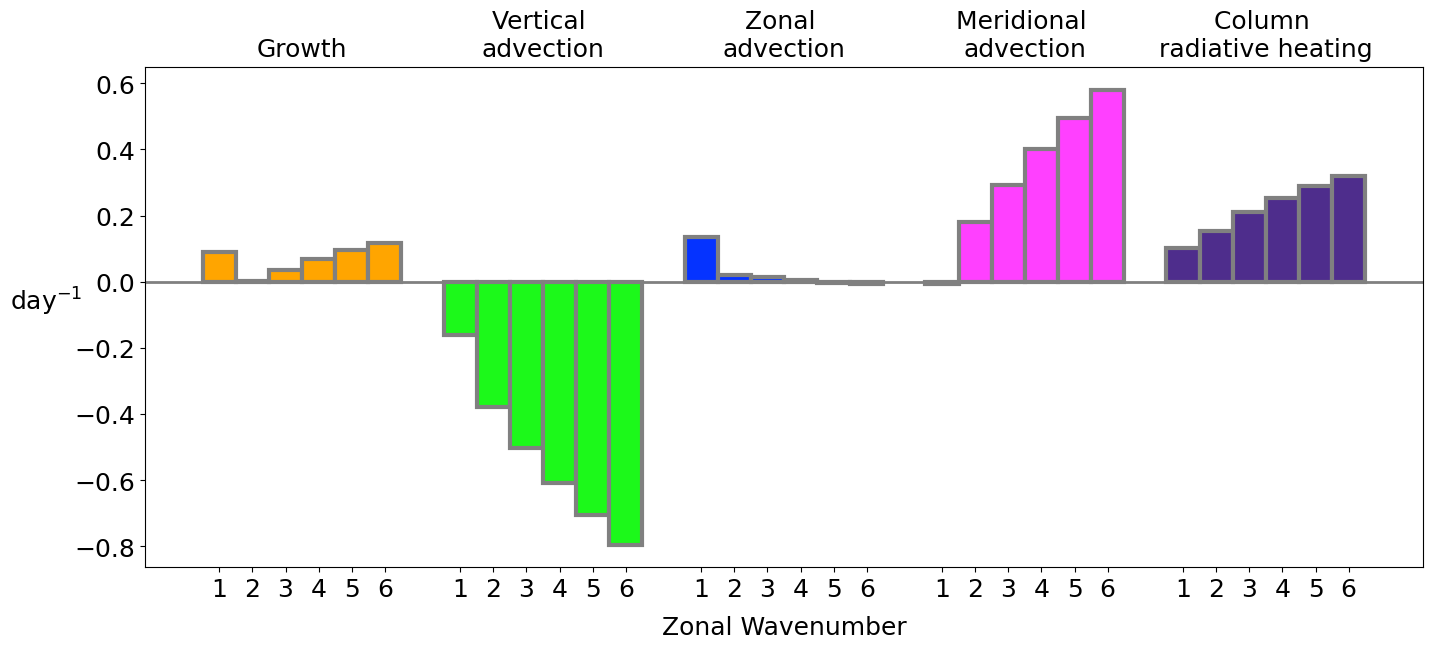

In [13]:
# Label the bars 
# bar_labels = [r'Growth', r'ω$_1$mM$_s$', r'σ$_x$u$_1$', r'-σ$_y$yv$_1$', r'$\langle$Q$_r$$\rangle$']
bar_labels = [
    "Growth",
    f"Vertical \nadvection" ,
    # f"Column \nprocesses",
    f"Zonal \nadvection",
    f"Meridional \nadvection",
    f"Column \nradiative heating",
    # r'$\mathcal{D}\nabla^{2} \langle$h$\rangle$', 
    # r'residual'
]
bar_colors = ['#ffa500', '#1cf91a', '#0533ff', '#ff40ff', '#4e2d8c']
# bar_colors = ['#ffa500', '#1cf91a', '#0533ff', '#ff40ff']

# bar_labels = [r'Growth', r'ω$_1$mM$_s$ + $\langle$Q$_r$$\rangle$', r'σ$_x$u$_1$', r'-σ$_y$yv$_1$']
# bar_colors = ['#ffa500', '#1cf91a', '#0533ff', '#ff40ff']

south_bound = multi_scale_growth_budgets.attrs['Latitude Bounds'][0]
north_bound = multi_scale_growth_budgets.attrs['Latitude Bounds'][1]

width = 0.1375
multiplier = 0
x = np.arange(len(bar_labels))

t = day_to_index(400)

plt.style.use('default')
plt.rcParams.update({'font.size':18})
[fig, ax] = plt.subplots(1, 1, figsize=(16.5, 6.5))
bar_max = []
for k in multi_scale_growth_budgets["k"]:
    offset = width * multiplier
    bar_values = [
        SECONDS_PER_DAY*multi_scale_growth_budgets['growth'].sel(k=k).isel(time=t),
        SECONDS_PER_DAY*multi_scale_growth_budgets['omega'].sel(k=k).isel(time=t),
        # SECONDS_PER_DAY*(
        #     multi_scale_growth_budgets['omega'].sel(k=k).isel(time=t) + multi_scale_growth_budgets['Qr'].sel(k=k).isel(time=t)
        # ),
        SECONDS_PER_DAY*multi_scale_growth_budgets['u'].sel(k=k).isel(time=t),
        SECONDS_PER_DAY*multi_scale_growth_budgets['v'].sel(k=k).isel(time=t),
        SECONDS_PER_DAY*multi_scale_growth_budgets['Qr'].sel(k=k).isel(time=t)
    ]
    bar_max.append(np.max(bar_values))
    
    rects = ax.bar(
        x + offset, 
        bar_values, 
        label = bar_labels, 
        color = bar_colors, 
        width = width,
        edgecolor='gray', 
        linewidth=3,
        align='center'
    )    
    # ax.bar_label(rects, padding=0.3)
    multiplier += 1

for l in range(len(bar_labels)):
    ax.text(l+2.5*offset/5, 1.175*np.max(bar_max), s=bar_labels[l], ha='center')

ax.axhline(y = 0, color='gray', lw=2)

# ax.set_title(
#     f"{experiment_to_load} case \n Growth budget at day {downsampled_timepoints[t]/SECONDS_PER_DAY:0.1f}," 
#     + f" averaged over {mjo.tick_labeller([south_bound], 'lat')[0]}-{mjo.tick_labeller([north_bound], 'lat')[0]}",
#     pad=40
# ) 
# ax.set_ylim(-0.01, 0.01)
ax.set_xticks(
    np.concatenate((x, x+offset/5, x+2*offset/5, x+3*offset/5, x+4*offset/5, x+offset)),
    sorted(np.arange(len(bar_labels)*len(initial_conditions_to_load))%len(initial_conditions_to_load)+1)
)
ax.set_ylabel(r'day$^{-1}$', rotation=0, labelpad=20)
ax.set_xlabel('Zonal Wavenumber', labelpad=10)
# ax.legend()
plt.show()
# plt.savefig(
#       f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/figures/"
#     + f"{initial_condition_type}-initial-condition_multi-scale_growth-budget"
#     + f"_{downsampled_timepoints[t]/SECONDS_PER_DAY:0.1f}-days"    
#     + f"_{mjo.tick_labeller([south_bound], 'lat', False)[0]}-{mjo.tick_labeller([north_bound], 'lat', False)[0]}"
#     + (f"_{time.strftime('%Y%m%d-%H%M')}" if save_timestamp else '')
#     + f".png", 
#     bbox_inches='tight'
# )

##### Column Process

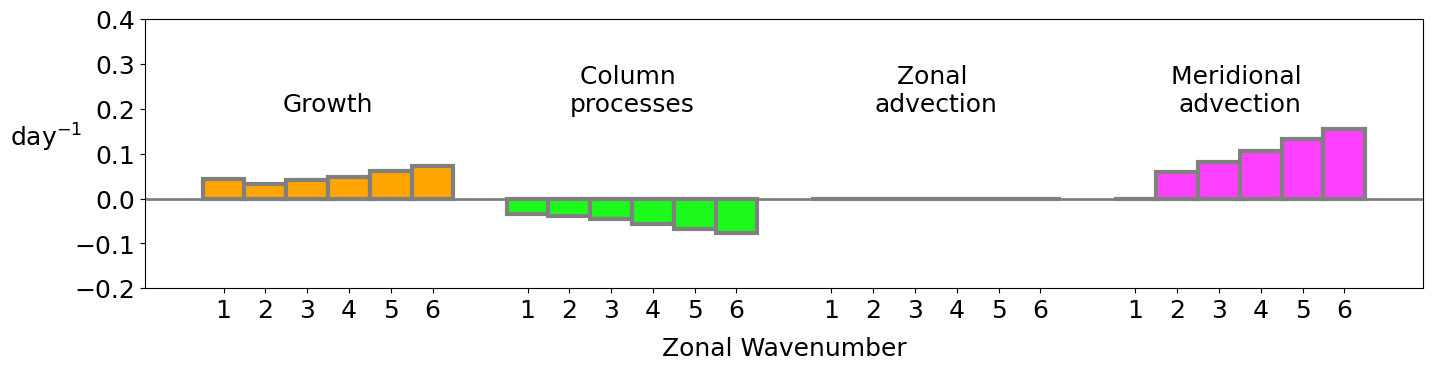

In [72]:
# Label the bars 
# bar_labels = [r'Growth', r'ω$_1$mM$_s$', r'σ$_x$u$_1$', r'-σ$_y$yv$_1$', r'$\langle$Q$_r$$\rangle$']
bar_labels = [
    "Growth",
    # f"Vertical \nadvection" ,
    f"Column \nprocesses",
    f"Zonal \nadvection",
    f"Meridional \nadvection",
    # f"Column \nradiative heating",
    # r'$\mathcal{D}\nabla^{2} \langle$h$\rangle$', 
    # r'residual'
]
# bar_colors = ['#ffa500', '#1cf91a', '#0533ff', '#ff40ff', '#4e2d8c']
bar_colors = ['#ffa500', '#1cf91a', '#0533ff', '#ff40ff']

# bar_labels = [r'Growth', r'ω$_1$mM$_s$ + $\langle$Q$_r$$\rangle$', r'σ$_x$u$_1$', r'-σ$_y$yv$_1$']
# bar_colors = ['#ffa500', '#1cf91a', '#0533ff', '#ff40ff']

south_bound = multi_scale_growth_budgets.attrs['Latitude Bounds'][0]
north_bound = multi_scale_growth_budgets.attrs['Latitude Bounds'][1]

width = 0.1375
multiplier = 0
x = np.arange(len(bar_labels))

t = day_to_index(360)

plt.style.use('default')
plt.rcParams.update({'font.size':18})
[fig, ax] = plt.subplots(1, 1, figsize=(16.5, 3.5))
bar_max = []
for k in multi_scale_growth_budgets["k"]:
    offset = width * multiplier
    bar_values = [
        SECONDS_PER_DAY*multi_scale_growth_budgets['growth'].sel(k=k).isel(time=t),
        # SECONDS_PER_DAY*multi_scale_growth_budgets['omega'].sel(k=k).isel(time=t),
        SECONDS_PER_DAY*(
            multi_scale_growth_budgets['omega'].sel(k=k).isel(time=t) + multi_scale_growth_budgets['Qr'].sel(k=k).isel(time=t)
        ),
        SECONDS_PER_DAY*multi_scale_growth_budgets['u'].sel(k=k).isel(time=t),
        SECONDS_PER_DAY*multi_scale_growth_budgets['v'].sel(k=k).isel(time=t),
        # SECONDS_PER_DAY*multi_scale_growth_budgets['Qr'].sel(k=k).isel(time=t)
    ]
    bar_max.append(np.max(bar_values))
    
    rects = ax.bar(
        x + offset, 
        bar_values, 
        label = bar_labels, 
        color = bar_colors, 
        width = width,
        edgecolor='gray', 
        linewidth=3,
        align='center'
    )    
    # ax.bar_label(rects, padding=0.3)
    multiplier += 1

for l in range(len(bar_labels)):
    ax.text(l+2.5*offset/5, 1.25*np.max(bar_max), s=bar_labels[l], ha='center')

ax.axhline(y = 0, color='gray', lw=2)

# ax.set_title(
#     f"{experiment_to_load} case \n Growth budget at day {downsampled_timepoints[t]/SECONDS_PER_DAY:0.1f}," 
#     + f" averaged over {mjo.tick_labeller([south_bound], 'lat')[0]}-{mjo.tick_labeller([north_bound], 'lat')[0]}",
#     pad=40
# ) 
# ax.set_ylim(-0.01, 0.01)
ax.set_xticks(
    np.concatenate((x, x+offset/5, x+2*offset/5, x+3*offset/5, x+4*offset/5, x+offset)),
    sorted(np.arange(len(bar_labels)*len(initial_conditions_to_load))%len(initial_conditions_to_load)+1)
)
ax.set_ylabel(r'day$^{-1}$', rotation=0, labelpad=20)
ax.set_yticks(np.arange(-0.2, 0.4, 0.1))
ax.set_xlabel('Zonal Wavenumber', labelpad=10)
# ax.legend()
plt.show()
# plt.savefig(
#       f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/figures/"
#     + f"{initial_condition_type}-initial-condition_multi-scale_growth-budget"
#     + f"_{downsampled_timepoints[t]/SECONDS_PER_DAY:0.1f}-days"    
#     + f"_{mjo.tick_labeller([south_bound], 'lat', False)[0]}-{mjo.tick_labeller([north_bound], 'lat', False)[0]}"
#     + (f"_{time.strftime('%Y%m%d-%H%M')}" if save_timestamp else '')
#     + f".png", 
#     bbox_inches='tight'
# )

#### Animation

In [ ]:
starting_frame = day_to_index(2)
ending_frame = day_to_index(360)
frame_interval = day_to_index(2)

south_bound = multi_scale_growth_budgets.attrs['Latitude Bounds'][0]
north_bound = multi_scale_growth_budgets.attrs['Latitude Bounds'][1]

# Label the bars 
bar_labels = [r'Growth', r'ω$_1$mM$_s$', r'σ$_x$u$_1$', r'-σ$_y$yv$_1$', r'$\langle$Q$_r$$\rangle$']
bar_colors = ['#ffa500', '#1cf91a', '#0533ff', '#ff40ff', '#4e2d8c']

wavenumber_max = []
wavenumber_min = []
for k in multi_scale_growth_budgets["k"]:
    wavenumber_max.append(
        np.max(
            (
                multi_scale_growth_budgets['growth'].sel(k=k).isel(time=slice(starting_frame, ending_frame)),
                multi_scale_growth_budgets['omega'].sel(k=k).isel(time=slice(starting_frame, ending_frame)),
                multi_scale_growth_budgets['u'].sel(k=k).isel(time=slice(starting_frame, ending_frame)),
                multi_scale_growth_budgets['v'].sel(k=k).isel(time=slice(starting_frame, ending_frame)),
                multi_scale_growth_budgets['Qr'].sel(k=k).isel(time=slice(starting_frame, ending_frame)),
            )
        )
    )
    wavenumber_min.append(
        np.min(
            (
                multi_scale_growth_budgets['growth'].sel(k=k).isel(time=slice(starting_frame, ending_frame)),
                multi_scale_growth_budgets['omega'].sel(k=k).isel(time=slice(starting_frame, ending_frame)),
                multi_scale_growth_budgets['u'].sel(k=k).isel(time=slice(starting_frame, ending_frame)),
                multi_scale_growth_budgets['v'].sel(k=k).isel(time=slice(starting_frame, ending_frame)),
                multi_scale_growth_budgets['Qr'].sel(k=k).isel(time=slice(starting_frame, ending_frame)),
            )
        )
    )

grand_max = np.max(wavenumber_max)*SECONDS_PER_DAY
grand_min = np.min(wavenumber_min)*SECONDS_PER_DAY

plt.style.use('default')
plt.rcParams.update({'font.size':18})
[fig, ax] = plt.subplots(1, 1, figsize=(16.5, 6.5))

def update(frame):
    # Set the bar width
    width = 0.1375
    multiplier = 0
    x = np.arange(len(bar_labels))

    ax.clear()
    
    bar_max = []
    for k in multi_scale_growth_budgets["k"]:
        offset = width * multiplier
        bar_values = [
                SECONDS_PER_DAY*multi_scale_growth_budgets['growth'].sel(k=k).isel(time=frame),
                SECONDS_PER_DAY*multi_scale_growth_budgets['omega'].sel(k=k).isel(time=frame),
                SECONDS_PER_DAY*multi_scale_growth_budgets['u'].sel(k=k).isel(time=frame),
                SECONDS_PER_DAY*multi_scale_growth_budgets['v'].sel(k=k).isel(time=frame),
                SECONDS_PER_DAY*multi_scale_growth_budgets['Qr'].sel(k=k).isel(time=frame),
            ]
        bar_max.append(np.max(bar_values))
        
        rects = ax.bar(
            x + offset, 
            bar_values, 
            label = k, 
            color = bar_colors, 
            width = width,
            edgecolor='gray', 
            linewidth=3,
            align='center'
        )    
        # ax.bar_label(rects, padding=0.3)
        multiplier += 1
    
    for l in range(len(bar_labels)):
        # ax.text(l, 1.2*np.max(bar_max), s=bar_labels[l])
        ax.text(l, 0.05+1.1*round_out(grand_max, 'tenths'), s=bar_labels[l])
    
    ax.axhline(y = 0, color='gray', lw=2)
    
    ax.set_title(
        f"{experiment_to_load} case\nGrowth budget at day {downsampled_timepoints[frame]/SECONDS_PER_DAY:0.1f}," 
        + f" averaged over {mjo.tick_labeller([south_bound], 'lat')[0]}-{mjo.tick_labeller([north_bound], 'lat')[0]}",
        pad=40
    ) 
    ax.set_xticks(
        np.concatenate((x, x+offset/5, x+2*offset/5, x+3*offset/5, x+4*offset/5, x+offset)),
        sorted(np.arange(len(bar_labels)*len(initial_conditions_to_load))%len(initial_conditions_to_load)+1)
    )
    ax.set_ylabel(r'day$^{-1}$', rotation=0, labelpad=22)
    ax.set_xlabel('Zonal Wavenumber', labelpad=10)
    ax.set_ylim(1.1*round_out(grand_min, 'tenths'), 1.1*round_out(grand_max, 'tenths'))

# Run the animation
anim = FuncAnimation(
    fig, 
    update, 
    frames=tqdm(
        np.arange(starting_frame, ending_frame, frame_interval), 
        ncols=100, 
        position=0, 
        leave=True
    ), interval=300,
)

anim.save(
    f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/figures/"
    + f"{initial_condition_type}-initial-condition_multi-scale_growth-budget_animation"
    + f"_{mjo.tick_labeller([south_bound], 'lat', False)[0]}-{mjo.tick_labeller([north_bound], 'lat', False)[0]}"
    + (f"_{time.strftime('%Y%m%d-%H%M')}" if save_timestamp else '')
    + f".mp4", 
    dpi=150,
)

### Propagation Budgets

#### Single time

In [ ]:
# Label the bars 
bar_labels = [r'propagation', r'ω$_1$mM$_s$', r'σ$_x$u$_1$', r'-σ$_y$yv$_1$', r'$\langle$Q$_r$$\rangle$']
bar_colors = ['#ffa500', '#1cf91a', '#0533ff', '#ff40ff', '#4e2d8c']

south_bound = multi_scale_propagation_budgets.attrs['Latitude Bounds'][0]
north_bound = multi_scale_propagation_budgets.attrs['Latitude Bounds'][1]

width = 0.15
multiplier = 0
x = np.arange(len(bar_labels))

# y_max = 2.25

plt.style.use('default')
plt.rcParams.update({'font.size':18})
[fig, ax] = plt.subplots(1, 1, figsize=(16.5, 6.5))
bar_max = []
t = day_to_index(360)
for k in multi_scale_propagation_budgets["k"]:
    
    offset = width * multiplier
    bar_values = [
            multi_scale_propagation_budgets['propagation'].sel(k=k).isel(time=t),
            multi_scale_propagation_budgets['omega'].sel(k=k).isel(time=t),
            multi_scale_propagation_budgets['u'].sel(k=k).isel(time=t),
            multi_scale_propagation_budgets['v'].sel(k=k).isel(time=t),
            multi_scale_propagation_budgets['Qr'].sel(k=k).isel(time=t)
        ]
    bar_max.append(np.max(bar_values))
    rects = ax.bar(
        x + offset, 
        bar_values, 
        label = exp, 
        color = bar_colors, 
        width = width,
        edgecolor='gray', 
        linewidth=3,
        align='center'
    )    
    # ax.bar_label(rects, padding=0.3)
    multiplier += 1

for l in range(len(bar_labels)):
    ax.text(l, 0.2+np.max(bar_max), s=bar_labels[l])

ax.axhline(y = 0, color='gray', lw=2)

ax.set_title(
    f"{experiment_to_load} case \n Propagation budget at day {downsampled_timepoints[t]/SECONDS_PER_DAY:0.1f}," 
    + f" averaged over {mjo.tick_labeller([south_bound], 'lat')[0]}-{mjo.tick_labeller([north_bound], 'lat')[0]}",
    pad=40
) 
ax.set_xticks(
    np.concatenate((x, x+offset/5, x+2*offset/5, x+3*offset/5, x+4*offset/5, x+offset)),
    sorted(np.arange(len(bar_labels)*len(initial_conditions_to_load))%len(initial_conditions_to_load)+1)
)
# ax.set_ylabel(r's$^{-1}$', rotation=0, labelpad=20)
ax.set_xlabel('Zonal Wavenumber', labelpad=10)
# ax.legend()
plt.show()
# plt.savefig(
#       f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/figures/"
#     + f"{initial_condition_type}-initial-condition_multi-scale_multi_scale_propagation-budget"
#     + f"_{downsampled_timepoints[t]/SECONDS_PER_DAY:0.1f}-days"    
#     + f"_{mjo.tick_labeller([south_bound], 'lat', False)[0]}-{mjo.tick_labeller([north_bound], 'lat', False)[0]}"
#     + (f"_{time.strftime('%Y%m%d-%H%M')}" if save_timestamp else '')
#     + f".png", 
#     bbox_inches='tight'
# )

#### Animation

In [ ]:
starting_frame = day_to_index(2)
ending_frame = day_to_index(360)
frame_interval = day_to_index(2)

# Label the bars 
bar_labels = [r'Propagation', r'ω$_1$mM$_s$', r'σ$_x$u$_1$', r'-σ$_y$yv$_1$', r'$\langle$Q$_r$$\rangle$']
bar_colors = ['#ffa500', '#1cf91a', '#0533ff', '#ff40ff', '#4e2d8c']

south_bound = multi_scale_propagation_budgets.attrs['Latitude Bounds'][0]
north_bound = multi_scale_propagation_budgets.attrs['Latitude Bounds'][1]

wavenumber_max = []
wavenumber_min = []
for k in multi_scale_propagation_budgets["k"]:
    wavenumber_max.append(
        np.max(
            (
                multi_scale_propagation_budgets['propagation'].sel(k=k).isel(time=slice(starting_frame,ending_frame)),
                multi_scale_propagation_budgets['omega'].sel(k=k).isel(time=slice(starting_frame,ending_frame)),
                multi_scale_propagation_budgets['u'].sel(k=k).isel(time=slice(starting_frame,ending_frame)),
                multi_scale_propagation_budgets['v'].sel(k=k).isel(time=slice(starting_frame,ending_frame)),
                multi_scale_propagation_budgets['Qr'].sel(k=k).isel(time=slice(starting_frame,ending_frame)),
            )
        )
    )
    wavenumber_min.append(
        np.min(
            (
                multi_scale_propagation_budgets['propagation'].sel(k=k).isel(time=slice(starting_frame,ending_frame)),
                multi_scale_propagation_budgets['omega'].sel(k=k).isel(time=slice(starting_frame,ending_frame)),
                multi_scale_propagation_budgets['u'].sel(k=k).isel(time=slice(starting_frame,ending_frame)),
                multi_scale_propagation_budgets['v'].sel(k=k).isel(time=slice(starting_frame,ending_frame)),
                multi_scale_propagation_budgets['Qr'].sel(k=k).isel(time=slice(starting_frame,ending_frame)),
            )
        )
    )

grand_max = np.max(wavenumber_max)
grand_min = np.min(wavenumber_min)

plt.style.use('default')
plt.rcParams.update({'font.size':18})
[fig, ax] = plt.subplots(1, 1, figsize=(16.5, 6.5))

def update(frame):
    # Set the bar width
    width = 0.15
    multiplier = 0
    x = np.arange(len(bar_labels))

    ax.clear()
    
    bar_max = []
    for k in multi_scale_propagation_budgets["k"]:
        offset = width * multiplier
        bar_values = [
            multi_scale_propagation_budgets['propagation'].sel(k=k).isel(time=frame),
            multi_scale_propagation_budgets['omega'].sel(k=k).isel(time=frame),
            multi_scale_propagation_budgets['u'].sel(k=k).isel(time=frame),
            multi_scale_propagation_budgets['v'].sel(k=k).isel(time=frame),
            multi_scale_propagation_budgets['Qr'].sel(k=k).isel(time=frame),
            ]
        bar_max.append(np.max(bar_values))
        
        rects = ax.bar(
            x + offset, 
            bar_values, 
            label = k, 
            color = bar_colors, 
            width = width,
            edgecolor='gray', 
            linewidth=3,
            align='center'
        )    
        # ax.bar_label(rects, padding=0.3)
        multiplier += 1
    
    for l in range(len(bar_labels)):
        # ax.text(l, 1.2*np.max(bar_max), s=bar_labels[l])
        ax.text(l, 0.08+1.1*round_out(grand_max, 'tenths'), s=bar_labels[l])
    
    ax.axhline(y = 0, color='gray', lw=2)
    
    ax.set_title(
        f"{experiment_to_load} case \nPropagation Budget at day {downsampled_timepoints[frame]/SECONDS_PER_DAY:0.1f}," 
        + f" averaged over {mjo.tick_labeller([south_bound], 'lat')[0]}-{mjo.tick_labeller([north_bound], 'lat')[0]}",
        pad=40
    ) 
    ax.set_xticks(
        # np.concatenate((x, x+offset/3, x+2*offset/3, x+offset)),
        np.concatenate((x, x+offset/5, x+2*offset/5, x+3*offset/5, x+4*offset/5, x+offset)),
        sorted(np.arange(len(bar_labels)*len(initial_conditions_to_load))%len(initial_conditions_to_load)+1)
    )
    # ax.set_ylabel(r'day$^{-1}$', rotation=0, labelpad=22)
    ax.set_xlabel('Zonal Wavenumber', labelpad=10)
    # ax.set_ylim(-2, 2)
    ax.set_ylim(1.1*round_out(grand_min, 'tenths'), 1.1*round_out(grand_max, 'tenths'))

# Run the animation
anim = FuncAnimation(
    fig, 
    update, 
    frames=tqdm(
        np.arange(starting_frame, ending_frame, frame_interval), 
        ncols=100, 
        position=0, 
        leave=True
    ), interval=300,
)

anim.save(
    f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/figures/"
    + f"{initial_condition_type}-initial-condition_multi-scale_propagation-budget_animation"
    + f"_{mjo.tick_labeller([south_bound], 'lat', False)[0]}-{mjo.tick_labeller([north_bound], 'lat', False)[0]}"
    + (f"_{time.strftime('%Y%m%d-%H%M')}" if save_timestamp else '')
    + f".mp4", 
    dpi=150,
)

## Phase speeds

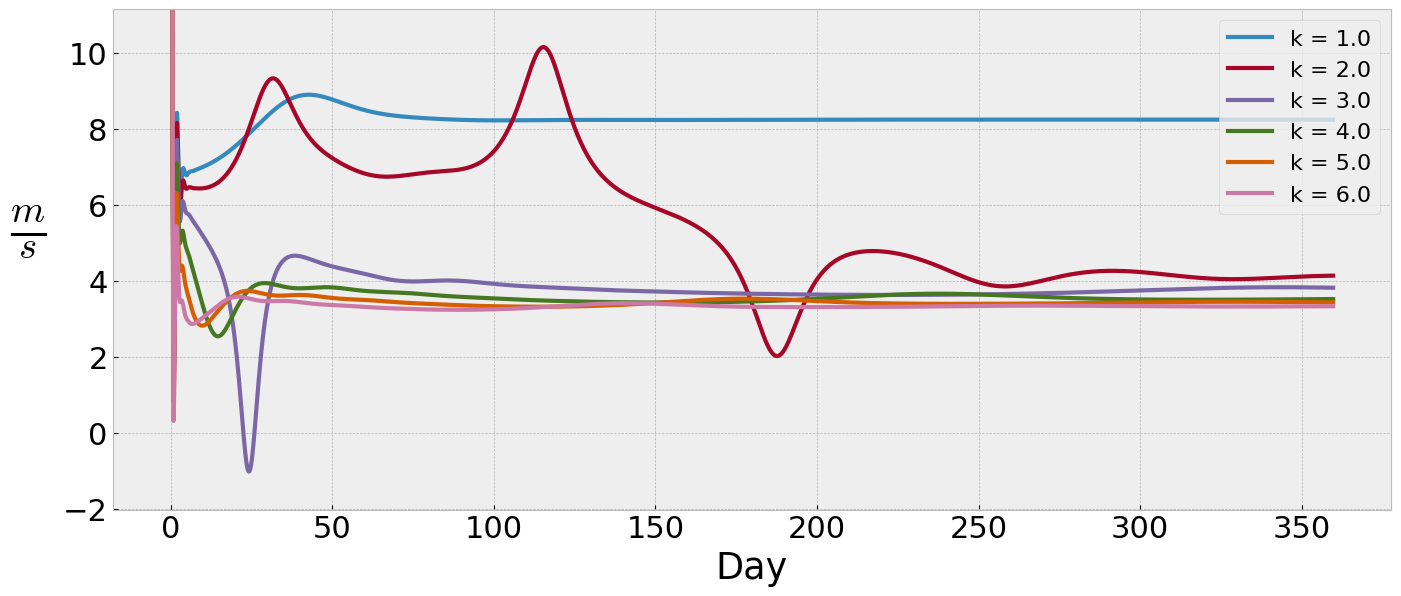

In [73]:
grand_max = []
grand_min = []

south_bound = multi_scale_phase_speeds.attrs['Latitude Bounds'][0]
north_bound = multi_scale_phase_speeds.attrs['Latitude Bounds'][1]

plt.style.use('bmh')
plt.rcParams.update({'font.size':22})
[fig, ax] = plt.subplots(1, 1, figsize=(16.5, 6.5))
for k in multi_scale_phase_speeds["k"]:
    ax.plot(
        downsampled_timepoints/SECONDS_PER_DAY, 
        multi_scale_phase_speeds.sel(k=k),
        label=f"k = {k:0.1f}", 
        lw=3
    )

    grand_max.append(multi_scale_phase_speeds.sel(k=k).isel(time=slice(day_to_index(3), day_to_index(360))).max())
    grand_min.append(multi_scale_phase_speeds.sel(k=k).isel(time=slice(day_to_index(3), day_to_index(360))).min())

grand_max = np.max(grand_max)
grand_min = np.min(grand_min)

ax.set_ylim(grand_min-1, grand_max+1)
# ax.set_title(
#     f"{experiment_to_load} case \nInstantaneous phase speeds averaged over "
#     + f"{np.abs(multi_scale_phase_speeds[index].attrs['Latitude Bounds'][0])}°S"
#     + f" - {np.abs(multi_scale_phase_speeds[index].attrs['Latitude Bounds'][1])}°N", 
#     pad=15,
#     fontsize=20
# )
ax.set_xlabel('Day')
ax.set_ylabel(r'$\frac{m}{s}$', rotation=0, labelpad=25, fontsize=40)
ax.legend(fontsize=16)
plt.show()
# plt.savefig(
#       f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/"
#     + f"{initial_condition_type}-initial-condition_multi-scale_instantaneous-phase-speeds"
#     + f"_{mjo.tick_labeller([south_bound], 'lat', False)[0]}-{mjo.tick_labeller([north_bound], 'lat', False)[0]}.nc"
#     (+ f"_{time.strftime('%Y%m%d-%H%M')}" if save_timestamp else '')
#     + f".png", 
#     bbox_inches='tight'
# )

## Pattern correlations

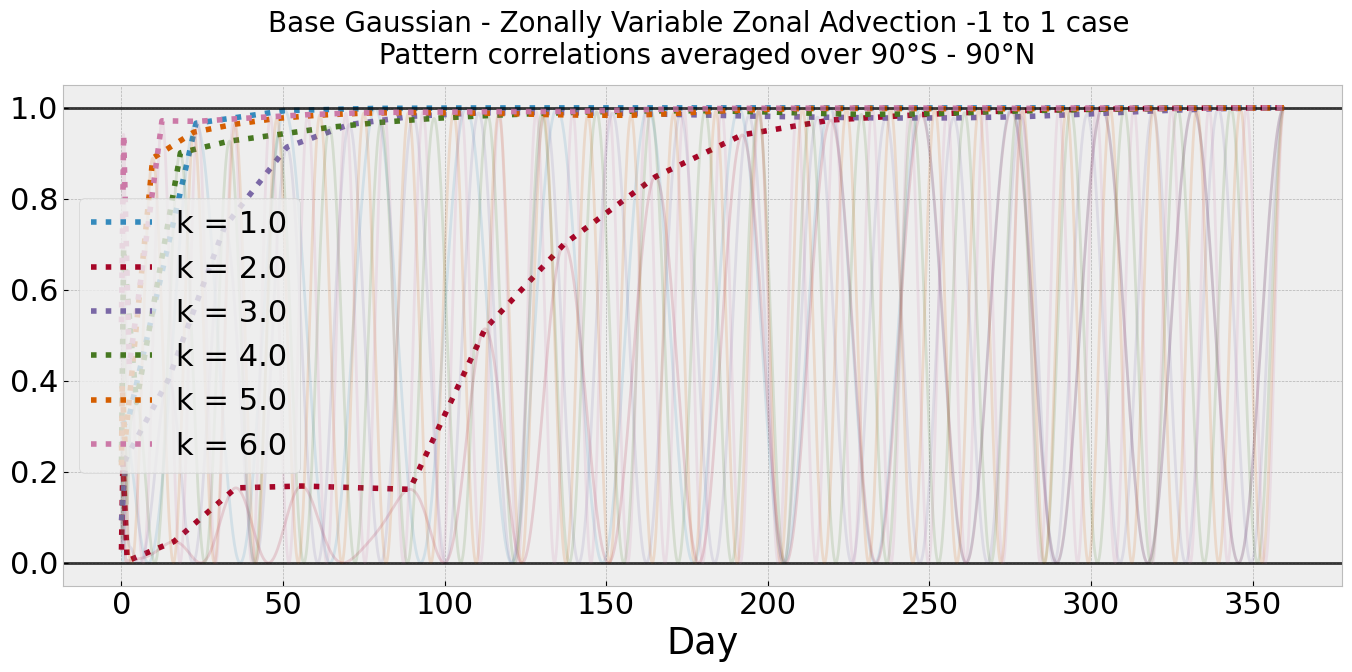

In [74]:
plt.style.use('bmh')
plt.rcParams.update({'font.size':22})
[fig, ax] = plt.subplots(1, 1, figsize=(16.5, 6.5))
for k in multi_scale_pattern_correlations["k"]:
    peaks = sp.signal.find_peaks(multi_scale_pattern_correlations.sel(k=k)**2)[0]
    padded_peaks = np.insert(peaks, 0, 0)
    padded_peaks = np.append(padded_peaks, len(downsampled_timepoints)-1)
    
    # ax.plot(
    # pattern_correlations[exp]['time']/SECONDS_PER_DAY, 
    # pattern_correlations[exp],
    # label=f"k = {(index+1):0.1f}", 
    # lw=3
    # )

    ax.plot(
        downsampled_timepoints/SECONDS_PER_DAY, 
        multi_scale_pattern_correlations.sel(k=k)**2, 
        color=bmh_colors(int(k)),
        lw=2,
        # label=f"k = {(index+1):0.1f}", 
        alpha=0.15
    )
    
    ax.plot(
        downsampled_timepoints[padded_peaks]/SECONDS_PER_DAY, 
        multi_scale_pattern_correlations.sel(k=k)[padded_peaks]**2, 
        color=bmh_colors(int(k)),
        lw=4,
        ls=':',
        label=f"k = {k:0.1f}", 
    )
    
    ax.axhline(y=0, color='k', alpha=0.2)
    ax.axhline(y=1, color='k', alpha=0.2)

# ax.set_xlim(10, 100)
# ax.set_ylim(-1, 1.05)
ax.set_title(
    f"{experiment_to_load} case \n Pattern correlations averaged over "
    + f"{np.abs(multi_scale_pattern_correlations.attrs['Latitude Bounds'][0])}°S"
    + f" - {np.abs(multi_scale_pattern_correlations.attrs['Latitude Bounds'][1])}°N", 
    pad=15,
    fontsize=20
)
ax.set_xlabel('Day')
# ax.set_ylabel(r'$\frac{m}{s}$', rotation=0, labelpad=25, fontsize=40)
ax.legend()
plt.show()
# plt.savefig(
#       f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/figures/"
#     + f"{initial_condition_type}-initial-condition_multi-scale_pattern-correlation"
#     + (f"_{time.strftime('%Y%m%d-%H%M')}" if save_timestamp else '')
#     + f".png", 
#     bbox_inches='tight'
# )

## Dispersion curves

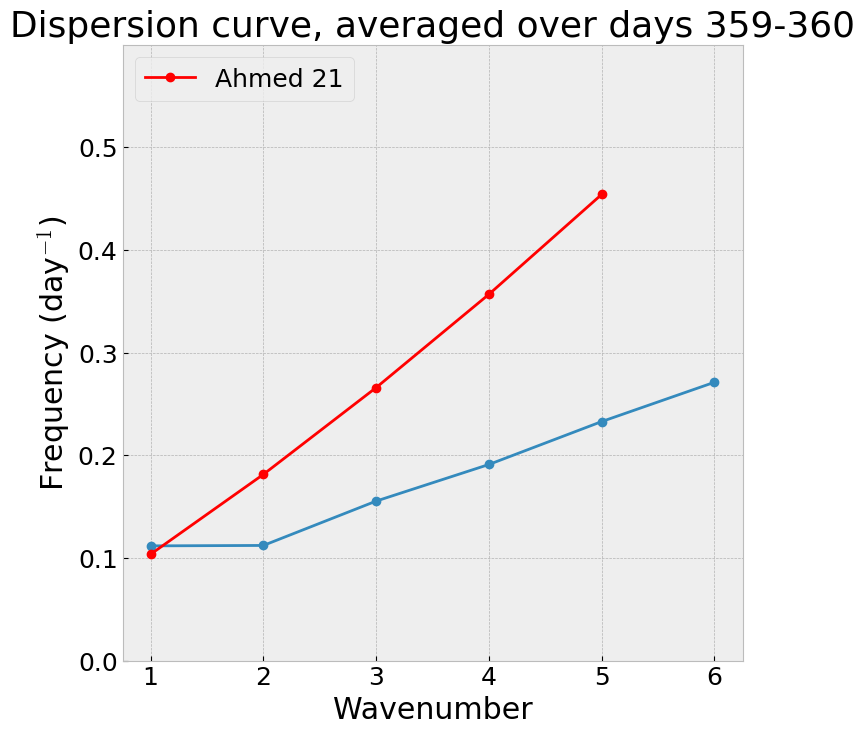

In [76]:
A21_frequencies = [0.103609, 0.181382, 0.265887, 0.356728, 0.453978]

starting_day = 359
ending_day = 360

# Plot dispersion curves
calculated_frequency = []
for k in multi_scale_phase_speeds["k"]:
    calculated_frequency.append(
        np.mean(
            multi_scale_phase_speeds.sel(k=k).isel(time=slice(day_to_index(starting_day),day_to_index(ending_day)))*(k/EARTH_RADIUS)
        )
    )
    # calculated_frequency.append(phase_speeds[exp][t]*(index+1)/EARTH_RADIUS)

plt.style.use('bmh')
plt.rcParams.update({'font.size':18})
[fig, ax] = plt.subplots(1, 1, figsize=(8, 8))
ax.set_title(f"Dispersion curve, averaged over days {starting_day}-{ending_day}")

ax.plot(
    np.array([1,2,3,4,5,6]),
    SECONDS_PER_DAY*np.array(calculated_frequency), marker='o'
)


ax.plot([1,2,3,4,5], A21_frequencies, label='Ahmed 21', marker='o', color='red')
ax.set_xlabel('Wavenumber')
ax.set_xticks(ticks=np.array([1,2,3,4,5,6]), labels=np.array([1,2,3,4,5,6]))
frequency_ticks = np.arange(0, 0.6, 0.1)
ax.set_ylabel(r'Frequency (day$^{-1}$)')
ax.set_ylim(0, 0.6)
ax.set_yticks(ticks=frequency_ticks)
ax.legend(loc='upper left')


# ax2 = ax.twinx()
# ax.get_shared_y_axes().join(ax, ax2)

# ax2.set_ylim(0, 0.6)
# # period_ticks = [2*np.pi/120, 2*np.pi/30, 2*np.pi/12]
# period_tick_labels = [f"{2*np.pi/tick:0.0f}" for tick in frequency_ticks[1:]]
# ax2.set_yticks(ticks=frequency_ticks[1:], labels=period_tick_labels)
# ax2.set_ylabel('Period (day)')


plt.show()
# plt.savefig(
#       f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/figures/"
#     + f"{initial_condition_type}-initial-condition_dispersion-curve-plot"
#     + (f"_{time.strftime('%Y%m%d-%H%M')}" if save_timestamp else '')
#     + f".png", 
#     bbox_inches='tight'
# )

# Mode Number

## Calculate mode number

In [77]:
moisture_adjustment_timescale = 1/MOISTURE_SENSITIVITY
frequencies = np.fft.fftfreq(len(downsampled_timepoints), np.diff(downsampled_timepoints)[0])

multi_scale_mode_number = xr.DataArray(
    None, 
    coords=dict(k=[1,2,3,4,5,6]), 
    dims=("k"),
    attrs = {'Latitude Bounds':(None, None)}
)

starting_index = day_to_index(250)
ending_index = day_to_index(360)

print(f"{'Calculating mode number':^50}")
print(f"{'':{'='}^{50}}")
for k_index, k in enumerate(multi_scale_output_variables["k"].values):
    print(f"---- k = {k}")
    
    # Estimate the gravity wave adjustment timescale
    gravity_wave_timescale = (2*np.pi*EARTH_RADIUS/k)/gravity_wave_phase_speed

    # Estimate the timescale of the wave
    wave_timescale = 1/(np.mean(
            multi_scale_phase_speeds.sel(k=k)[starting_index:ending_index]
        )*k/(2*np.pi*EARTH_RADIUS))
    
    multi_scale_mode_number[k_index] = gravity_wave_timescale**2/(moisture_adjustment_timescale*wave_timescale)

print("Mode number calculated")
print(f"{'':{'='}^{50}}")

             Calculating mode number              
---- k = 1
---- k = 2
---- k = 3
---- k = 4
---- k = 5
---- k = 6
Mode number calculated


## Plot mode number as a function of wavenumber

KeyError: 'Base Gaussian - Zonally Variable Zonal Advection -1 to 1'

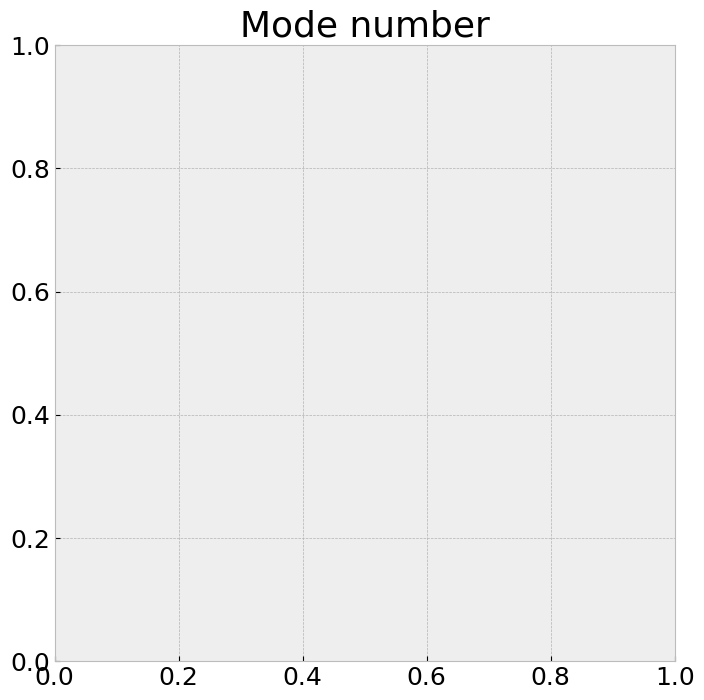

In [78]:
A21_frequencies = np.array([0.103609, 0.181382, 0.265887, 0.356728, 0.453978])
A21_wave_timescale = 2*np.pi/(A21_frequencies/SECONDS_PER_DAY)

A21_gravity_wave_timescale = np.empty((5))
for k in [1,2,3,4,5]:
    A21_gravity_wave_timescale[k-1] = (2*np.pi*EARTH_RADIUS/k)/gravity_wave_phase_speed

A21_mode_number = A21_gravity_wave_timescale**2/(moisture_adjustment_timescale*A21_wave_timescale)

plt.style.use('bmh')
plt.rcParams.update({'font.size':18})
[fig, ax] = plt.subplots(1, 1, figsize=(8, 8))
ax.set_title(f"Mode number")

ax.plot(
    np.array([1,2,3,4,5,6]),
    multi_scale_mode_number.values, 
    marker='o',
    label=experiment_to_load,
    color = experiment_colors[experiment_to_load]
)

ax.plot([1,2,3,4,5], A21_mode_number, label='Ahmed 21', marker='o', color='red')
ax.set_xlabel('Wavenumber')
ax.set_xticks(ticks=np.array([1,2,3,4,5,6]), labels=np.array([1,2,3,4,5,6]))
ax.set_yscale('log')
ax.set_yticks([0.1, 1, 10])
ax.legend(loc='best')


plt.show()

# Compare across experiments

## Load multi-experiment data

In [80]:
# print(f"    Multi-experiment data         ")
print(f"{'Multi-experiment data':^50}")
save_timestamp = False

experiments_to_load = [
    # 'Ahmed-21',
    # 'Narrow Mean State',
    'Gaussian Mean Moisture',
    # 'Asymmetric Gaussian Mean Moisture',
    # 'Variable Moisture Sensitivity',
    # 'Asymmetric Variable Moisture Sensitivity',
    # 'Variable Convective Sensitivities',
    # 'Equal Convective Sensitivities',
    # 'Reduced Temperature Sensitivity',
    # 'No Temperature Sensitivity',
    # 'Asymmetric No Temperature Sensitivity',  
    # 'Variable r',
    # 'Variable Mq',
    # 'Wide Mean State',    
    # 'Wide Mean State - No Temperature Sensitivity',
    # 'Narrow Mean State - No Temperature Sensitivity',
    # 'Indian Ocean',
    # 'Maritime Continent',
    # 'Western Pacific',
    # "Variable Mq - Normal Sensitivity - Double Zonal Advection",
    # "Variable Mq - Normal Sensitivity - Double Zonal Advection - Rayleigh Friction",
    # "Meridionally Variable Zonal Advection",
    # "No Meridional Wind - Zonally Variable Zonal Advection"
    # "No Meridional Wind - Zonally Variable Zonal Advection 0 to 1 - No Temperature Sensitivity",
    # "No Meridional Wind - Zonally Variable Zonal Advection -1 to 1 - No Temperature Sensitivity",
    "Base Gaussian - Zonally Variable Zonal Advection -1 to 1"
]

print(f"{'':{'='}^{50}}")
print("Loading grid variables...")
k = 1
specified_initial_condition_name = f"k={k}.0_m=1_Kelvin-wave"
initial_condition_type = specified_initial_condition_name.split('_')[-1]

specified_output_file_directory = f"output/Ahmed-21/{experiments_table[experiments_to_load[0]]}"

downsampled_data = xr.load_dataset(
    f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/"
    + f"{specified_initial_condition_name}" 
    + f"_downsampled-model-data_compiled.nc"
)

output_zonal_gridpoints = downsampled_data.x.to_numpy()
output_meridional_gridpoints = downsampled_data.y.to_numpy()
downsampled_timepoints = downsampled_data.time.to_numpy()
print("Grid variables loaded")
print(f"{'':{'='}^{50}}")

print("Loading experiment variables...")
#### Load experiment variables
with open(
    f"{specified_output_file_directory}/experiment_variables.json", 'r') as json_file:
    loaded_experiment_variables = json.load(json_file)

simulation_moisture = loaded_experiment_variables['simulation_moisture']
moisture_advection = loaded_experiment_variables['moisture_advection']
simulation_damping = loaded_experiment_variables['simulation_damping']
moisture_coupling = loaded_experiment_variables['moisture_coupling']
simulation_diffusion = loaded_experiment_variables['simulation_diffusion']
fringe_region = loaded_experiment_variables['fringe_region']
moisture_sensitivity_structure = loaded_experiment_variables['moisture_sensitivity_structure']
temperature_sensitivity_structure = loaded_experiment_variables['temperature_sensitivity_structure']
mean_moisture_profile = loaded_experiment_variables['mean_moisture_profile']
gaussian_length_scale = loaded_experiment_variables['moisture_length_scale']
GRAVITY = loaded_experiment_variables['GRAVITY']
EQUIVALENT_DEPTH = loaded_experiment_variables['EQUIVALENT_DEPTH']
CORIOLIS_PARAMETER = loaded_experiment_variables['CORIOLIS_PARAMETER']
EARTH_RADIUS = loaded_experiment_variables['EARTH_RADIUS']
AIR_DENSITY = loaded_experiment_variables['AIR_DENSITY']
WATER_DENSITY = loaded_experiment_variables['WATER_DENSITY']
LATENT_HEAT = loaded_experiment_variables['LATENT_HEAT']
SPECIFIC_HEAT = loaded_experiment_variables['SPECIFIC_HEAT']
DIFFUSIVITY = loaded_experiment_variables['DIFFUSIVITY']
METERS_PER_DEGREE = loaded_experiment_variables['METERS_PER_DEGREE']
SECONDS_PER_DAY = loaded_experiment_variables['SECONDS_PER_DAY']
COLUMN_AVERAGE_MASS = loaded_experiment_variables['COLUMN_AVERAGE_MASS']
GROSS_DRY_STABILITY = loaded_experiment_variables['GROSS_DRY_STABILITY']
MOISTURE_SENSITIVITY = loaded_experiment_variables['MOISTURE_SENSITIVITY']
TEMPERATURE_SENSITIVITY = loaded_experiment_variables['TEMPERATURE_SENSITIVITY']
CLOUD_RADIATIVE_PARAMETER = loaded_experiment_variables['CLOUD_RADIATIVE_PARAMETER']
sigma_x_multiplier = loaded_experiment_variables['sigma_x_multiplier']
sigma_y_multiplier = loaded_experiment_variables['sigma_y_multiplier']
ZONAL_MOISTENING_PARAMETER = loaded_experiment_variables['ZONAL_MOISTENING_PARAMETER']
MERIDIONAL_MOISTENING_PARAMETER = loaded_experiment_variables['MERIDIONAL_MOISTENING_PARAMETER']
MERIDIONAL_OFFSET_PARAMETER = loaded_experiment_variables['MERIDIONAL_OFFSET_PARAMETER']
gravity_wave_phase_speed = loaded_experiment_variables['gravity_wave_phase_speed']
time_scale = loaded_experiment_variables['time_scale']
length_scale = loaded_experiment_variables['length_scale']
gross_moisture_stratification = loaded_experiment_variables['gross_moisture_stratification']
effective_sensitivity = loaded_experiment_variables['effective_sensitivity']
effective_gross_moist_stability = loaded_experiment_variables['effective_gross_moist_stability']
scaled_zonal_parameter = loaded_experiment_variables['scaled_zonal_parameter']
scaled_meridional_parameter = loaded_experiment_variables['scaled_meridional_parameter']
n_days = loaded_experiment_variables['n_days']
n_chunks = loaded_experiment_variables['n_chunks']
n_time_steps = loaded_experiment_variables['n_time_steps']
meridional_domain_length = loaded_experiment_variables['meridional_domain_length']
zonal_domain_length = loaded_experiment_variables['zonal_domain_length']
nt = loaded_experiment_variables['nt']    
nx = loaded_experiment_variables['nx']
ny = loaded_experiment_variables['ny']
zonal_grid_spacing = loaded_experiment_variables['zonal_grid_spacing']
meridional_grid_spacing = loaded_experiment_variables['meridional_grid_spacing']
simulation_length = loaded_experiment_variables['simulation_length']
time_step = loaded_experiment_variables['time_step']
zonal_step_size = loaded_experiment_variables['zonal_step_size']
meridional_step_size = loaded_experiment_variables['meridional_step_size']
CFL_x = loaded_experiment_variables['CFL_x']
CFL_y = loaded_experiment_variables['CFL_y']
fringe_region_latitude = loaded_experiment_variables['fringe_region_latitude']
fringe_region_width = loaded_experiment_variables['fringe_region_width']
fringe_region_strength = loaded_experiment_variables['fringe_region_strength']
grid_scaling = loaded_experiment_variables['grid_scaling']
additional_notes = loaded_experiment_variables['additional_notes']
simulation_name = loaded_experiment_variables['simulation_name']
output_file_directory = loaded_experiment_variables['output_file_directory']
n_rk_steps = loaded_experiment_variables['n_rk_steps']
save_downsampled = loaded_experiment_variables['save_downsampled']

# output_wavenumber = eval(specified_initial_condition_name.split('_')[0].split('=')[-1])/EARTH_RADIUS
zonal_wavenumber      = 2*np.pi*fftfreq(nx, zonal_step_size)       # zonal wavenumbers
meridional_wavenumber = 2*np.pi*fftfreq(ny, meridional_step_size)  # meridional wavenumbers
frequencies           = 2*np.pi*fftfreq(nt, time_step)             # frequencies

print("Experiment variables loaded")
print(f"{'':{'='}^{50}}")

#### Initialize data metric arrays
multi_experiment_growth_budgets = xr.Dataset(
    data_vars=dict(
        growth=(["experiment", "k", "time"], np.empty((len(experiments_to_load), 6, len(downsampled_timepoints)))),
        omega=(["experiment", "k", "time"], np.empty((len(experiments_to_load), 6, len(downsampled_timepoints)))),
        u=(["experiment", "k", "time"], np.empty((len(experiments_to_load), 6, len(downsampled_timepoints)))),
        v=(["experiment", "k", "time"], np.empty((len(experiments_to_load), 6, len(downsampled_timepoints)))),
        Qr=(["experiment", "k", "time"], np.empty((len(experiments_to_load), 6, len(downsampled_timepoints)))),
        D=(["experiment", "k", "time"], np.empty((len(experiments_to_load), 6, len(downsampled_timepoints)))),
        residual=(["experiment", "k", "time"], np.empty((len(experiments_to_load), 6, len(downsampled_timepoints)))),
), 
    coords=dict(
        experiment=experiments_to_load,
        k=[1,2,3,4,5,6], 
        time=downsampled_timepoints
    ), 
    attrs = {'Latitude Bounds':(None, None)}
)

multi_experiment_propagation_budgets = xr.Dataset(
    data_vars=dict(
        propagation=(["experiment", "k", "time"], np.empty((len(experiments_to_load), 6, len(downsampled_timepoints)))),
        omega=(["experiment", "k", "time"], np.empty((len(experiments_to_load), 6, len(downsampled_timepoints)))),
        u=(["experiment", "k", "time"], np.empty((len(experiments_to_load), 6, len(downsampled_timepoints)))),
        v=(["experiment", "k", "time"], np.empty((len(experiments_to_load), 6, len(downsampled_timepoints)))),
        Qr=(["experiment", "k", "time"], np.empty((len(experiments_to_load), 6, len(downsampled_timepoints)))),
        D=(["experiment", "k", "time"], np.empty((len(experiments_to_load), 6, len(downsampled_timepoints)))),
        residual=(["experiment", "k", "time"], np.empty((len(experiments_to_load), 6, len(downsampled_timepoints)))),
), 
    coords=dict(
        experiment=experiments_to_load,
        k=[1,2,3,4,5,6], 
        time=downsampled_timepoints
    ), 
    attrs = {'Latitude Bounds':(None, None)}
)

multi_experiment_phase_speeds = xr.DataArray(
    None, 
    coords=dict(
        # experiment=[experiments_table[experiment] for experiment in experiments_to_load],
        experiment=experiments_to_load,
        k=[1,2,3,4,5,6], 
        time=downsampled_timepoints
    ), 
    dims=("experiment", "k", "time"),
    attrs = {'Latitude Bounds':(None, None)}
)

south_bound = -90
north_bound = 90

print(f"{'Loading experiment data...':<50}")
for experiment_index, experiment in enumerate(experiments_to_load):
    print(f"---- Experiment: {experiment}")
    for k_index, k in enumerate([1,2,3,4,5,6]):
        specified_initial_condition_name = f"k={k}.0_m=1_Kelvin-wave"
        specified_output_file_directory = f"output/Ahmed-21/{experiments_table[experiment]}"

        for budget_variable in multi_experiment_growth_budgets.data_vars:
            # Load the growth budget dataset for the current initial condition
            loaded_growth_budget = xr.load_dataset(
                f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/"
                + f"{specified_initial_condition_name}_MSE-growth-budget"
                + f"_{mjo.tick_labeller([south_bound], 'lat', False)[0]}-{mjo.tick_labeller([north_bound], 'lat', False)[0]}.nc"
                )
    
            # Assign the loaded growth budget to the initialized dataset
            multi_experiment_growth_budgets[budget_variable][experiment_index, k_index] = loaded_growth_budget[budget_variable]
            multi_experiment_growth_budgets.attrs['Latitude Bounds'] = loaded_growth_budget.attrs['Latitude Bounds']
            
        for budget_variable in multi_experiment_propagation_budgets.data_vars:
            # Load the propagation budget dataset for the current initial condition
            loaded_propagation_budget = xr.load_dataset(
                f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/"
                + f"{specified_initial_condition_name}_MSE-propagation-budget"
                + f"_{mjo.tick_labeller([south_bound], 'lat', False)[0]}-{mjo.tick_labeller([north_bound], 'lat', False)[0]}.nc"
                )
    
            # Assign the loaded propagation budget to the initialized dataset
            multi_experiment_propagation_budgets[budget_variable][experiment_index, k_index] = loaded_propagation_budget[budget_variable]
            multi_experiment_propagation_budgets.attrs['Latitude Bounds'] = loaded_propagation_budget.attrs['Latitude Bounds']
            
            
        loaded_phase_speeds = xr.load_dataarray(
            f"{specified_output_file_directory}/Kelvin-wave_initial-condition/"
            + f"{specified_initial_condition_name}_instantaneous-phase-speed"
            + f"_{mjo.tick_labeller([south_bound], 'lat', False)[0]}-{mjo.tick_labeller([north_bound], 'lat', False)[0]}.nc"
            )

        if experiment == 'Base Case':
            print("-------- Interpolating base case phase speeds...")
            subset_loaded_phase_speeds = loaded_phase_speeds.sel(time=slice(0, 360*SECONDS_PER_DAY))
            interpolated_phase_speeds = subset_loaded_phase_speeds.interp(time=downsampled_timepoints)
            loaded_phase_speeds = interpolated_phase_speeds.copy(deep=True)
            print("-------- Phase speeds interpolated")
            # print(f"{'':{'='}^{50}}")
    
        multi_experiment_phase_speeds[experiment_index, k_index] = loaded_phase_speeds
        multi_experiment_phase_speeds.attrs['Latitude Bounds'] = loaded_phase_speeds.attrs['Latitude Bounds']

print(f"{'Experiment data loaded':<50}")
print(f"{'':{'='}^{50}}")

              Multi-experiment data               
Loading grid variables...
Grid variables loaded
Loading experiment variables...
Experiment variables loaded
Loading experiment data...                        
---- Experiment: Gaussian Mean Moisture
---- Experiment: Base Gaussian - Zonally Variable Zonal Advection -1 to 1
Experiment data loaded                            


## Growth Budgets

### Rows for wavenunber

In [79]:
# # Label the bars 
# bar_labels = [r'Growth', r'ω$_1$mM$_s$', r'σ$_x$u$_1$', r'-σ$_y$yv$_1$', r'$\langle$Q$_r$$\rangle$']
# bar_colors = ['#ffa500', '#1cf91a', '#0533ff', '#ff40ff', '#4e2d8c']
# experiment_labels = f"(a) Gaussian Mean Moisture \n(b) Variable Moisture Sensitivity \n(c) No Temperature Sensitivity"

# # bar_labels = [r'Growth', r'ω$_1$mM$_s$ + $\langle$Q$_r$$\rangle$', r'σ$_x$u$_1$', r'-σ$_y$yv$_1$']
# # bar_colors = ['#ffa500', '#1cf91a', '#0533ff', '#ff40ff']

# south_bound = multi_experiment_growth_budgets.attrs['Latitude Bounds'][0]
# north_bound = multi_experiment_growth_budgets.attrs['Latitude Bounds'][1]

# t = day_to_index(360)

# plt.style.use('default')
# plt.rcParams.update({'font.size':18})
# fig = plt.figure(figsize=(12, 22))
# gs_main = gs.GridSpec(6, 1, figure=fig)
# gs_main.update(hspace=0.25)

# ax = []
# ax.append(fig.add_subplot(gs_main[0]))
# ax.append(fig.add_subplot(gs_main[1]))
# ax.append(fig.add_subplot(gs_main[2]))
# ax.append(fig.add_subplot(gs_main[3]))
# ax.append(fig.add_subplot(gs_main[4]))
# ax.append(fig.add_subplot(gs_main[5]))

# for row_index, k in enumerate(multi_experiment_growth_budgets["k"].values):
#     width = 0.1375
#     multiplier = 0
#     x = np.arange(len(bar_labels))
#     bar_max = []
#     for experiment in multi_experiment_growth_budgets["experiment"].values:
#         offset = width * multiplier
#         bar_values = [
#                 SECONDS_PER_DAY*multi_experiment_growth_budgets['growth'].sel(experiment=experiment, k=k).isel(time=t),
#                 SECONDS_PER_DAY*multi_experiment_growth_budgets['omega'].sel(experiment=experiment, k=k).isel(time=t),
#                 SECONDS_PER_DAY*multi_experiment_growth_budgets['u'].sel(experiment=experiment, k=k).isel(time=t),
#                 SECONDS_PER_DAY*multi_experiment_growth_budgets['v'].sel(experiment=experiment, k=k).isel(time=t),
#                 SECONDS_PER_DAY*multi_experiment_growth_budgets['Qr'].sel(experiment=experiment, k=k).isel(time=t),
#             ]
#         bar_max.append(np.max(bar_values))
        
#         rects = ax[row_index].bar(
#             x + offset, 
#             bar_values, 
#             label = experiment, 
#             color = bar_colors, 
#             width = width,
#             edgecolor='gray', 
#             # edgecolor='#bcbcbc', 
#             linewidth=3,
#             align='center'
#         )    
#         # ax.bar_label(rects, padding=0.3)
#         multiplier += 1

#     if row_index == 0:
#         for l in range(len(bar_labels)):
#             ax[row_index].text(l, 0.8, s=bar_labels[l])
    
#     ax[row_index].axhline(y = 0, color='gray', lw=2)
    
#     # ax[row_index].set_title(f"k = {k}", pad=10) 
#     ax[row_index].text(
#         0.021, 0.075, 
#         s=f"k = {k}", 
#         va='bottom',
#         bbox=dict(facecolor="#eeeeee", edgecolor="gray", boxstyle='round'), 
#         transform=ax[row_index].transAxes
#     )
#     ax[row_index].set_ylabel(r'day$^{-1}$', rotation=0, labelpad=20)
#     ax[row_index].set_xticklabels([''])
#     ax[row_index].set_ylim(-0.75, 0.75)

#     ax[row_index].set_xticks(
#         np.concatenate((x, x+offset/2, x+offset)),
#         # np.concatenate((x, x+offset/3, x+2*offset/3, x+offset)),
#         # np.concatenate((x, x+offset/5, x+2*offset/5, x+3*offset/5, x+4*offset/5, x+offset)),
#         # sorted(np.arange(len(bar_labels)*len(experiments_to_load))%len(experiments_to_load)+1)
#         np.repeat(['a', 'b', 'c'], 5)
#     )
    
# ax[-1].set_xlabel('Experiment', labelpad=10)
# ax[-1].text(
#     # l-1.2, -1.2*np.max(bar_max), 
#     0.5875, 0.075,
#     s=experiment_labels, 
#     bbox=dict(facecolor="#eeeeee", edgecolor="gray", linewidth=1, boxstyle='round'), 
#     transform=ax[-1].transAxes,
#     ha='left',
#     va='bottom',
#     fontsize=16
# )

# plt.show()
# # plt.savefig(
# #       f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/figures/"
# #     + f"{initial_condition_type}-initial-condition_multi-experiment_growth-budget"
# #     + f"_{downsampled_timepoints[t]/SECONDS_PER_DAY:0.1f}-days"    
# #     + f"_{mjo.tick_labeller([south_bound], 'lat', False)[0]}-{mjo.tick_labeller([north_bound], 'lat', False)[0]}"
# #     + (f"_{time.strftime('%Y%m%d-%H%M')}" if save_timestamp else '')
# #     + f".png", 
# #     bbox_inches='tight'
# # )

### Rows for budget term

#### Separate vertical advection and radiative heating

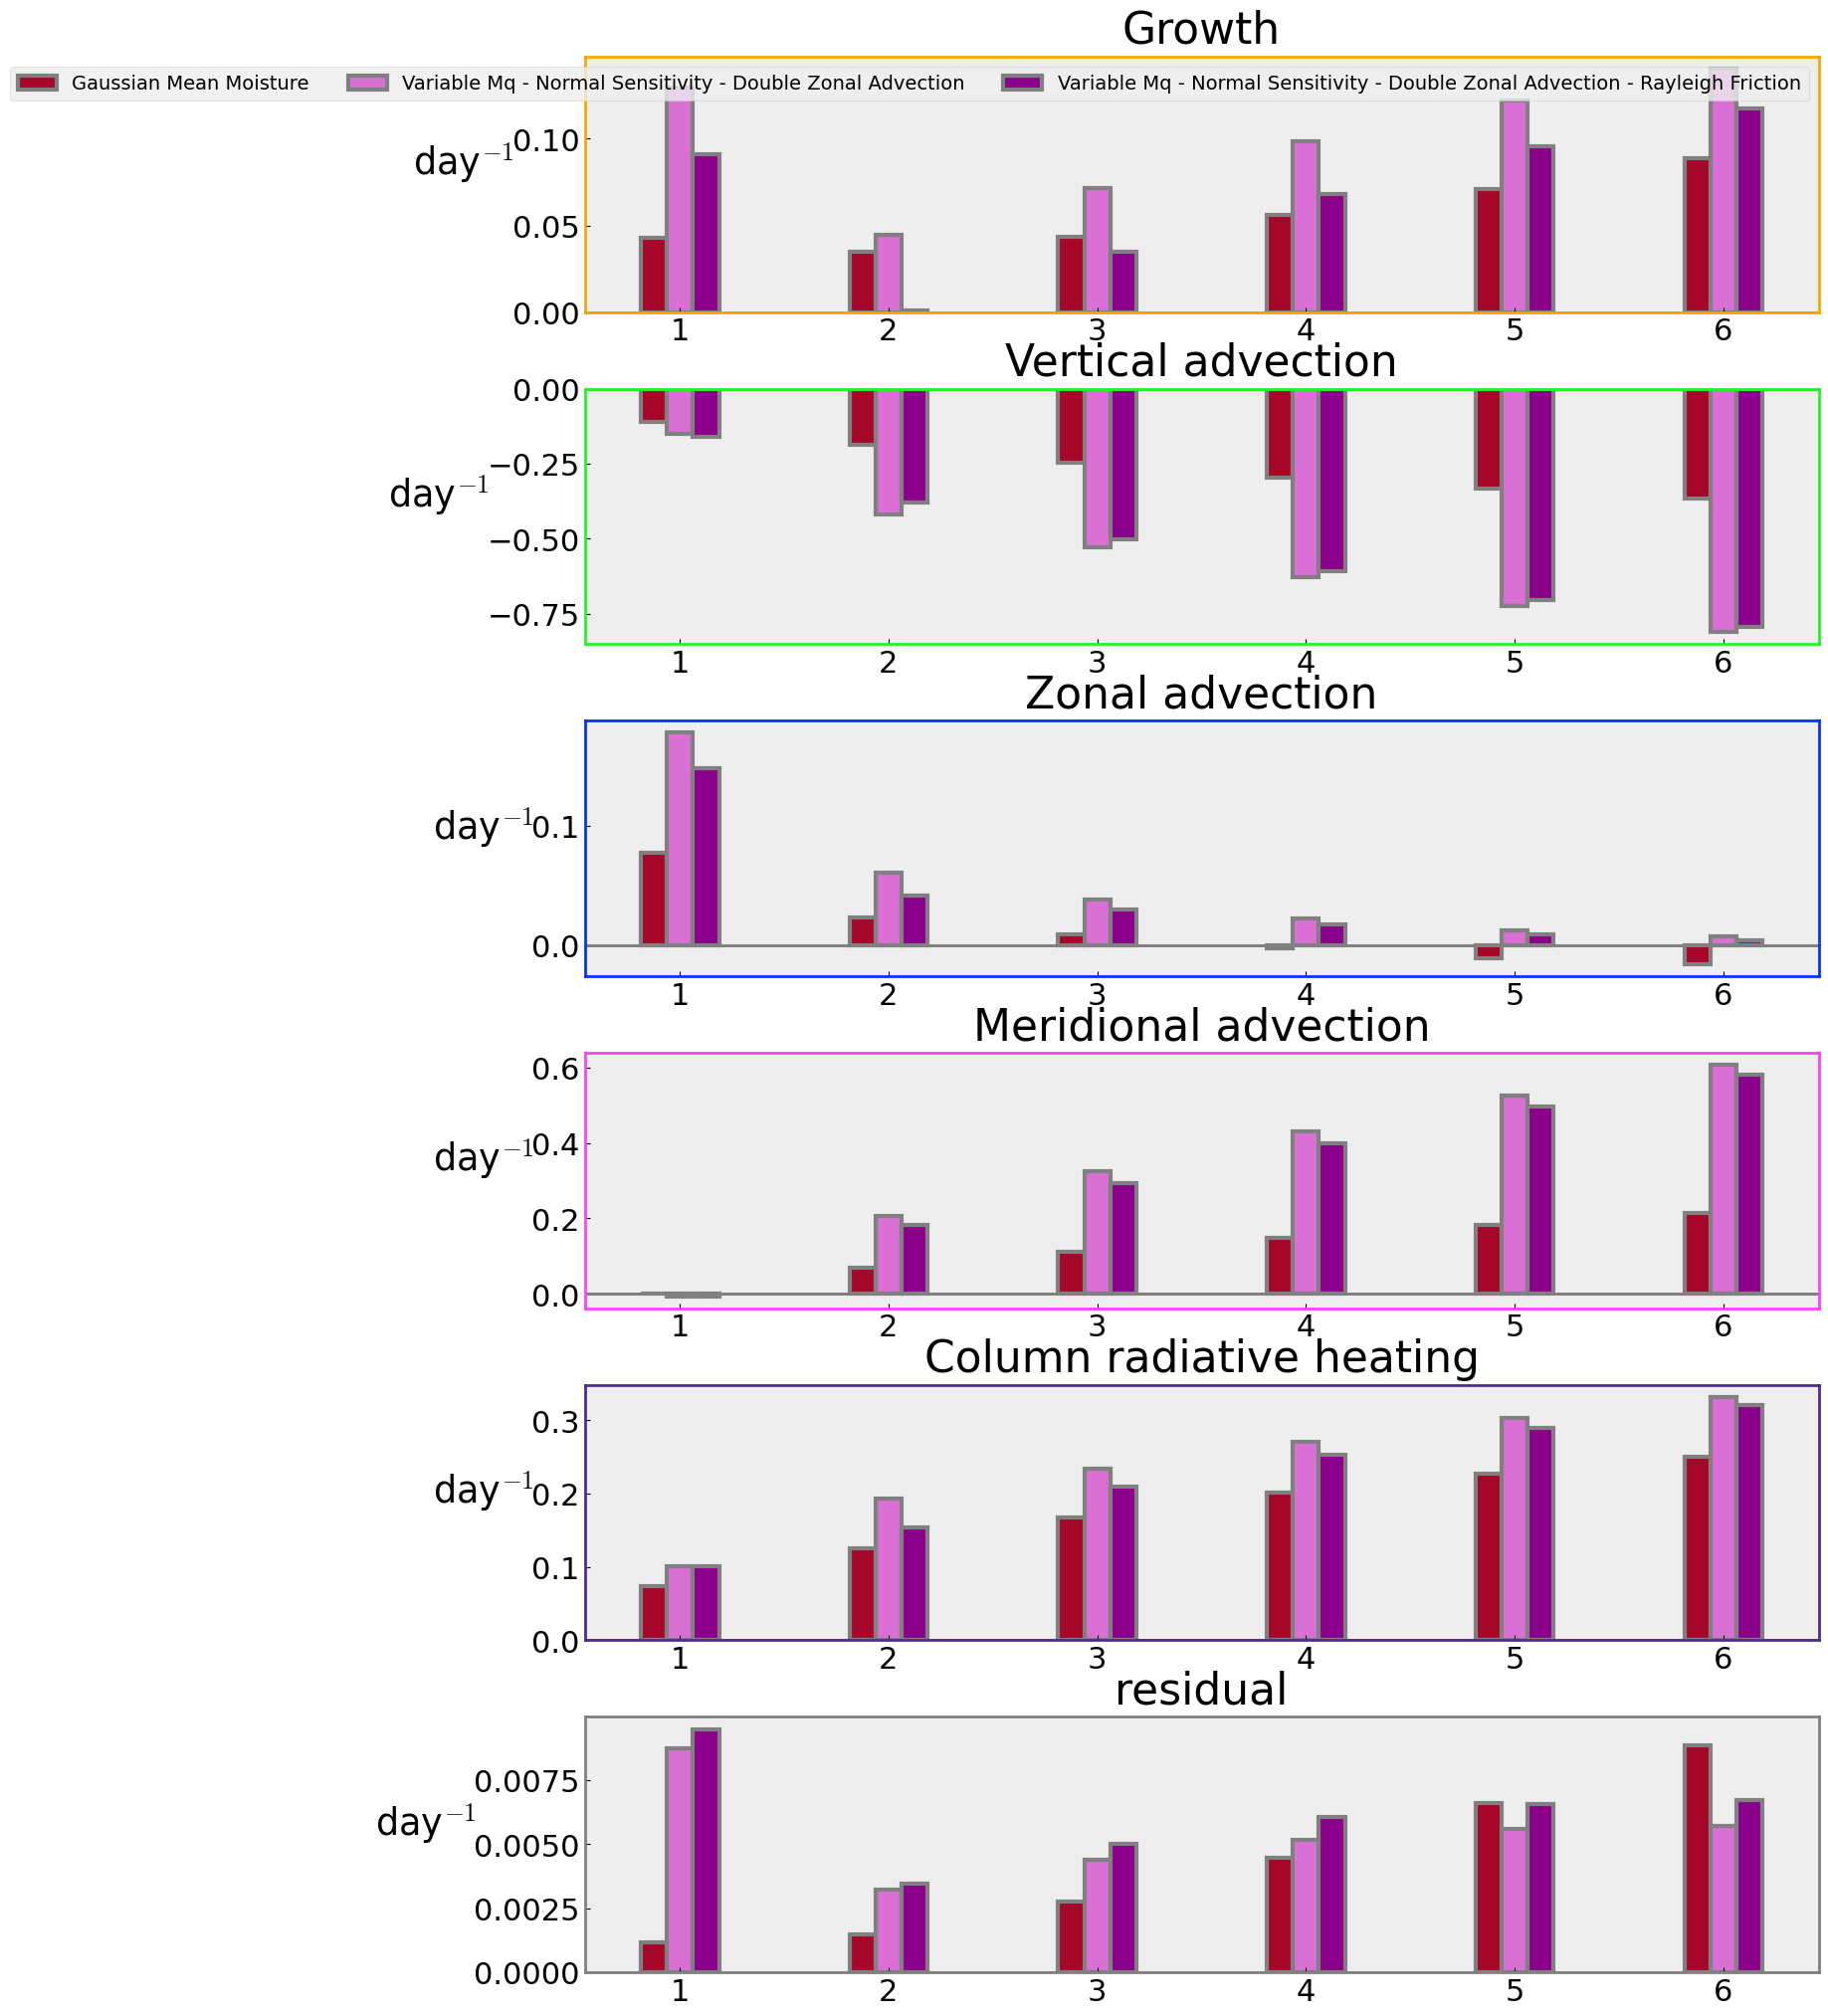

In [80]:
plt.style.use('bmh')
fig = plt.figure(figsize=(16,25))
gs_main = gs.GridSpec(6, 1, figure=fig)
gs_main.update(hspace=0.3)

variable_titles = [
    f"Growth",
    f"Vertical advection" ,
    f"Zonal advection",
    f"Meridional advection",
    f"Column radiative heating",
    # r'$\mathcal{D}\nabla^{2} \langle$h$\rangle$', 
    f'residual'
]

process_colors = {
    'growth'                   : '#ffa500', 
    'propagation'              : '#ffa500', 
    'vertical advection'       : '#1cf91a',
    'omega'                    : '#1cf91a',
    'column processes'         : '#1cf91a',
    'zonal advection'          : '#0533ff',
    'u'                        : '#0533ff',
    'meridional advection'     : '#ff40ff', 
    'v'                        : '#ff40ff', 
    'column radiative heating' : '#4e2d8c',
    'Qr'                       : '#4e2d8c',
    'diffusion'                : '#A60628',
    'residual'                 : 'gray',
}

ax = []
ax.append(fig.add_subplot(gs_main[0]))
ax.append(fig.add_subplot(gs_main[1]))
ax.append(fig.add_subplot(gs_main[2]))
ax.append(fig.add_subplot(gs_main[3]))
ax.append(fig.add_subplot(gs_main[4]))
ax.append(fig.add_subplot(gs_main[5]))

# ax.append(fig.add_subplot(gs_main[6]))
ax[0].set_title("Growth rate across scales and experiments", pad=10)
# width = 0.1375
width = 0.125
# width = 0.3

t = day_to_index(360)

grand_max = []
for variable in multi_experiment_growth_budgets.data_vars:
    grand_max.append(np.abs(SECONDS_PER_DAY*multi_experiment_growth_budgets[variable].isel(time=day_to_index(t)).values.max()))

grand_max = np.max(grand_max)

for index, variable in enumerate(["growth", "omega", "u", "v", "Qr", "residual"]):
    multiplier = 0
    ax[index].set_title(variable_titles[index], pad=10)
    for exp in experiments_to_load:
        offset = width*multiplier
        ax[index].bar(
            np.arange(1,7)+offset, 
            [
                SECONDS_PER_DAY*multi_experiment_growth_budgets[variable].sel(experiment = exp, k=1).isel(time=t),
                SECONDS_PER_DAY*multi_experiment_growth_budgets[variable].sel(experiment = exp, k=2).isel(time=t),
                SECONDS_PER_DAY*multi_experiment_growth_budgets[variable].sel(experiment = exp, k=3).isel(time=t),
                SECONDS_PER_DAY*multi_experiment_growth_budgets[variable].sel(experiment = exp, k=4).isel(time=t),
                SECONDS_PER_DAY*multi_experiment_growth_budgets[variable].sel(experiment = exp, k=5).isel(time=t),
                SECONDS_PER_DAY*multi_experiment_growth_budgets[variable].sel(experiment = exp, k=6).isel(time=t),
            ],
            width = width,
            # edgecolor=bar_colors[index], 
            edgecolor='gray', 
            label=exp,
            color=experiment_colors[exp],
            # edgecolor='#bcbcbc', 
            linewidth=3,
            align='center',
            # hatch=experiment_hatch[exp]
        )
        multiplier += 1
        # ax[index].set_ylim(-0.1, round_out(grand_max, 'tenths'))
        
        # if variable == 'omega':
            # ax[index].set_ylim(-round_out(grand_max, 'ones'), 0.1)
        
        ax[index].set_xticks(ticks=np.arange(1,7)+width*np.mean(np.arange(0,len(experiments_to_load))), labels=np.arange(1,7))
        # ax[index].set_xticks(ticks=np.arange(1,7)+offset-width/len(experiments_to_load), labels=np.arange(1,7))
        ax[index].set_ylabel(r'day$^{-1}$', rotation=0, labelpad=35)
        ax[index].axhline(y=0, color='gray', lw=2)
        # ax[index].set_ylim(-0.5, 0.5)
        
    for axis in ['top','bottom','left','right']:
        ax[index].spines[axis].set_linewidth(2)
        ax[index].spines[axis].set_color(process_colors[variable])

    ax[index].set_aspect('auto')
    ax[index].grid(False)
            
ax[0].legend(loc='best', fontsize=14, ncol=3)

plt.show()

#### Single Column Process term

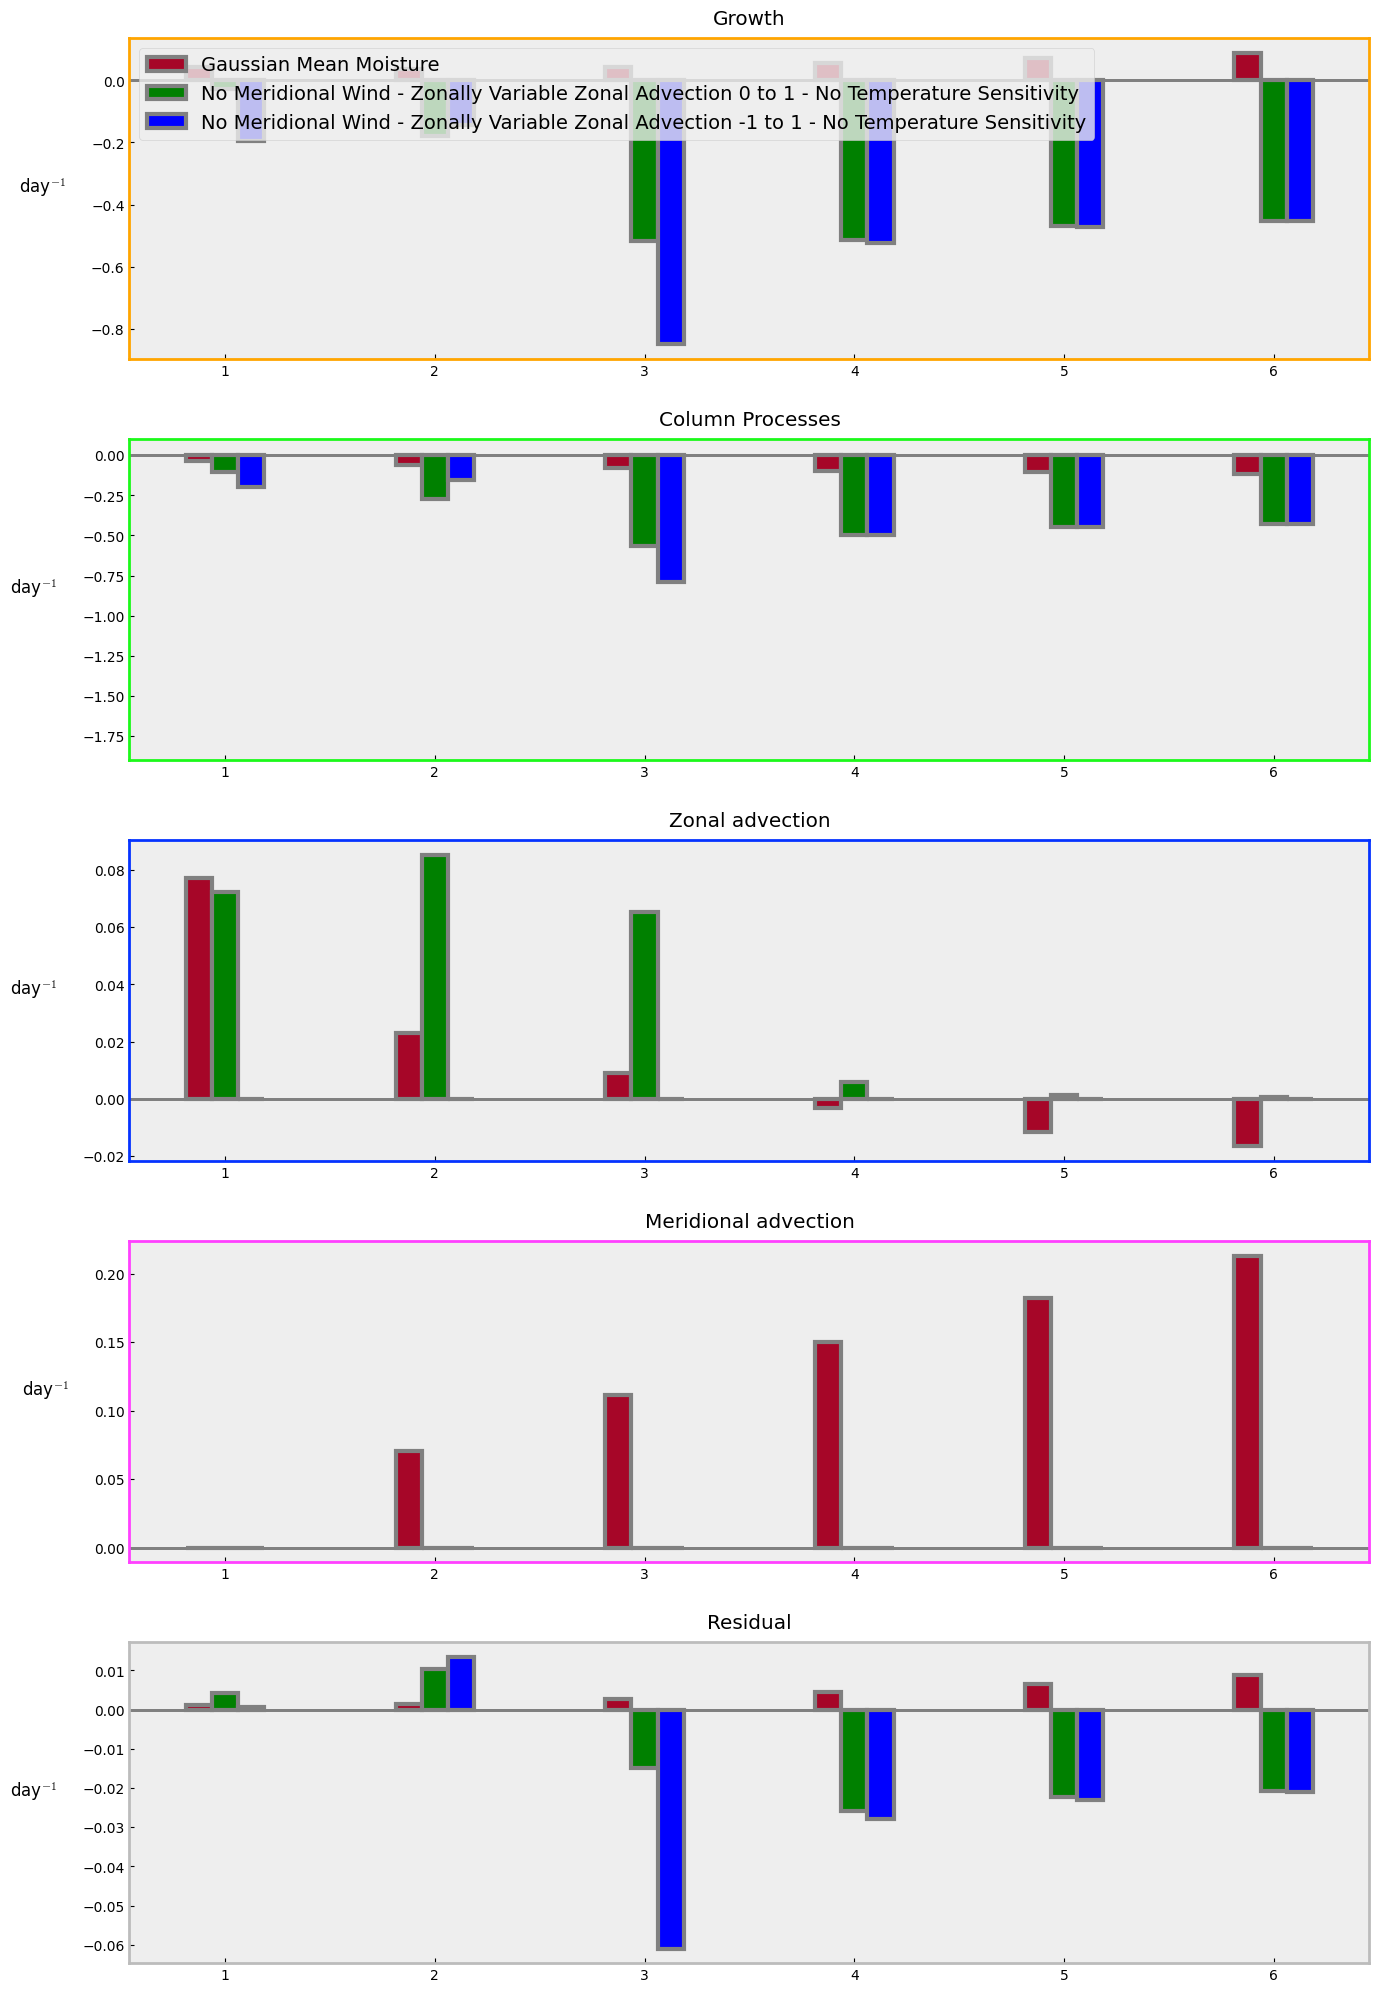

In [67]:
plt.style.use('bmh')
fig = plt.figure(figsize=(16,25))
gs_main = gs.GridSpec(5, 1, figure=fig)
gs_main.update(hspace=0.25)

# variable_titles = [
# f"Growth",
# f"Vertical advection" ,
# f"Zonal advection",
# f"Meridional advection",
# f"Column radiative heating",
# # r'$\mathcal{D}\nabla^{2} \langle$h$\rangle$', 
# # r'residual'
# ]

variable_titles = [
f"Growth",
f"Column Processes" ,
f"Zonal advection",
f"Meridional advection",
f"Residual"
]

process_colors = {
    'growth'                   : '#ffa500', 
    'propagation'              : '#ffa500', 
    'vertical advection'       : '#1cf91a',
    'omega'                    :  '#1cf91a',
    'column processes'         : '#1cf91a',
    'zonal advection'          : '#0533ff',
    'u'                        : '#0533ff',
    'meridional advection'     : '#ff40ff', 
    'v'                        : '#ff40ff', 
    'column radiative heating' : '#4e2d8c',
    'Qr'                       : '#4e2d8c',
    'diffusion'                : '#A60628',
    'residual'                 : '#bcbcbc',
}

ax = []
ax.append(fig.add_subplot(gs_main[0]))
ax.append(fig.add_subplot(gs_main[1]))
ax.append(fig.add_subplot(gs_main[2]))
ax.append(fig.add_subplot(gs_main[3]))
ax.append(fig.add_subplot(gs_main[4]))
# ax.append(fig.add_subplot(gs_main[5]))
# ax.append(fig.add_subplot(gs_main[6]))
ax[0].set_title("Growth rate across scales and experiments", pad=10)
# width = 0.1375
width = 0.125
# width = 0.3

t = day_to_index(360)

grand_max = []
for variable in multi_experiment_growth_budgets.data_vars:
    grand_max.append(np.abs(SECONDS_PER_DAY*multi_experiment_growth_budgets[variable].isel(time=day_to_index(t)).values.max()))

grand_max = np.max(grand_max)

for index, variable in enumerate(["growth", "omega", "u", "v", "residual"]):
    multiplier = 0
    ax[index].set_title(variable_titles[index], pad=10)
    for exp in experiments_to_load:
        offset = width*multiplier

        if variable != "omega": 
            ax[index].bar(
                np.arange(1,7)+offset, 
                [
                    SECONDS_PER_DAY*multi_experiment_growth_budgets[variable].sel(experiment = exp, k=1).isel(time=t),
                    SECONDS_PER_DAY*multi_experiment_growth_budgets[variable].sel(experiment = exp, k=2).isel(time=t),
                    SECONDS_PER_DAY*multi_experiment_growth_budgets[variable].sel(experiment = exp, k=3).isel(time=t),
                    SECONDS_PER_DAY*multi_experiment_growth_budgets[variable].sel(experiment = exp, k=4).isel(time=t),
                    SECONDS_PER_DAY*multi_experiment_growth_budgets[variable].sel(experiment = exp, k=5).isel(time=t),
                    SECONDS_PER_DAY*multi_experiment_growth_budgets[variable].sel(experiment = exp, k=6).isel(time=t),
                ],
                width = width,
                # edgecolor=bar_colors[index], 
                edgecolor='gray', 
                label=exp,
                color=experiment_colors[exp],
                # edgecolor='#bcbcbc', 
                linewidth=3,
                align='center',
                # hatch=experiment_hatch[exp]
            )
            # ax[index].set_ylim(-0.1, round_out(grand_max, 'tenths'))
        else:
            ax[index].bar(
                np.arange(1,7)+offset, 
                [
                    SECONDS_PER_DAY*(multi_experiment_growth_budgets["omega"].sel(experiment = exp, k=1).isel(time=t)+multi_experiment_growth_budgets["Qr"].sel(experiment = exp, k=1).isel(time=t)),
                    SECONDS_PER_DAY*(multi_experiment_growth_budgets["omega"].sel(experiment = exp, k=2).isel(time=t)+multi_experiment_growth_budgets["Qr"].sel(experiment = exp, k=2).isel(time=t)),
                    SECONDS_PER_DAY*(multi_experiment_growth_budgets["omega"].sel(experiment = exp, k=3).isel(time=t)+multi_experiment_growth_budgets["Qr"].sel(experiment = exp, k=3).isel(time=t)),
                    SECONDS_PER_DAY*(multi_experiment_growth_budgets["omega"].sel(experiment = exp, k=4).isel(time=t)+multi_experiment_growth_budgets["Qr"].sel(experiment = exp, k=4).isel(time=t)),
                    SECONDS_PER_DAY*(multi_experiment_growth_budgets["omega"].sel(experiment = exp, k=5).isel(time=t)+multi_experiment_growth_budgets["Qr"].sel(experiment = exp, k=5).isel(time=t)),
                    SECONDS_PER_DAY*(multi_experiment_growth_budgets["omega"].sel(experiment = exp, k=6).isel(time=t)+multi_experiment_growth_budgets["Qr"].sel(experiment = exp, k=6).isel(time=t)),
                ],
                width = width,
                # edgecolor=bar_colors[index], 
                edgecolor='gray', 
                label=exp,
                color=experiment_colors[exp],
                # edgecolor='#bcbcbc', 
                linewidth=3,
                align='center',
                # hatch=experiment_hatch[exp]
            )
            ax[index].set_ylim(-round_out(grand_max, 'tenths'), 0.1)
            
        multiplier += 1
        
        ax[index].set_xticks(ticks=np.arange(1,7)+width*np.mean(np.arange(0,len(experiments_to_load))), labels=np.arange(1,7))
        # ax[index].set_xticks(ticks=np.arange(1,7)+offset-width/len(experiments_to_load), labels=np.arange(1,7))
        ax[index].set_ylabel(r'day$^{-1}$', rotation=0, labelpad=35)
        ax[index].axhline(y=0, color='gray', lw=2)
        # ax[index].set_ylim(-0.5, 0.5)
        
    for axis in ['top','bottom','left','right']:
        ax[index].spines[axis].set_linewidth(2)
        ax[index].spines[axis].set_color(process_colors[variable])

    ax[index].set_aspect('auto')
    ax[index].grid(False)
        
ax[0].legend(loc='upper left', fontsize=14)

plt.show()

## Propagation Budgets

### Rows for wavenumber

In [ ]:
# Label the bars 
bar_labels = [r'Propagation', r'ω$_1$mM$_s$', r'σ$_x$u$_1$', r'-σ$_y$yv$_1$', r'$\langle$Q$_r$$\rangle$']
bar_colors = ['#ffa500', '#1cf91a', '#0533ff', '#ff40ff', '#4e2d8c']
experiment_labels = f"(a) Gaussian Mean Moisture \n(b) Variable Moisture Sensitivity \n(c) No Temperature Sensitivity"

# bar_labels = [r'Propagation', r'ω$_1$mM$_s$ + $\langle$Q$_r$$\rangle$', r'σ$_x$u$_1$', r'-σ$_y$yv$_1$']
# bar_colors = ['#ffa500', '#1cf91a', '#0533ff', '#ff40ff']

south_bound = multi_experiment_propagation_budgets.attrs['Latitude Bounds'][0]
north_bound = multi_experiment_propagation_budgets.attrs['Latitude Bounds'][1]

t = day_to_index(360)

plt.style.use('default')
plt.rcParams.update({'font.size':18})
fig = plt.figure(figsize=(12, 22))
gs_main = gs.GridSpec(6, 1, figure=fig)
gs_main.update(hspace=0.25)

ax = []
ax.append(fig.add_subplot(gs_main[0]))
ax.append(fig.add_subplot(gs_main[1]))
ax.append(fig.add_subplot(gs_main[2]))
ax.append(fig.add_subplot(gs_main[3]))
ax.append(fig.add_subplot(gs_main[4]))
ax.append(fig.add_subplot(gs_main[5]))

for row_index, k in enumerate(multi_experiment_propagation_budgets["k"].values):
    width = 0.1375
    multiplier = 0
    x = np.arange(len(bar_labels))
    bar_max = []
    for experiment in multi_experiment_propagation_budgets["experiment"].values:
        offset = width * multiplier
        bar_values = [
                multi_experiment_propagation_budgets['propagation'].sel(experiment=experiment, k=k).isel(time=t),
                multi_experiment_propagation_budgets['omega'].sel(experiment=experiment, k=k).isel(time=t),
                multi_experiment_propagation_budgets['u'].sel(experiment=experiment, k=k).isel(time=t),
                multi_experiment_propagation_budgets['v'].sel(experiment=experiment, k=k).isel(time=t),
                multi_experiment_propagation_budgets['Qr'].sel(experiment=experiment, k=k).isel(time=t),
            ]
        bar_max.append(np.max(bar_values))
        
        rects = ax[row_index].bar(
            x + offset, 
            bar_values, 
            label = exp, 
            color = bar_colors, 
            width = width,
            edgecolor='gray', 
            # edgecolor='#bcbcbc', 
            linewidth=3,
            align='center'
        )    
        # ax.bar_label(rects, padding=0.3)
        multiplier += 1

    if row_index == 0:
        for l in range(len(bar_labels)):
            ax[row_index].text(l, 2.2, s=bar_labels[l])
    
    ax[row_index].axhline(y = 0, color='gray', lw=2)
    
    # ax[row_index].set_title(f"k = {k}", pad=10) 
    ax[row_index].text(
        0.021, 0.075, 
        s=f"k = {k}", 
        va='bottom',
        bbox=dict(facecolor="#eeeeee", edgecolor="gray", boxstyle='round'), 
        transform=ax[row_index].transAxes
    )
    # ax[row_index].set_ylabel(r'day$^{-1}$', rotation=0, labelpad=20)
    ax[row_index].set_xticklabels([''])
    ax[row_index].set_ylim(-2.5, 2)

    ax[row_index].set_xticks(
        np.concatenate((x, x+offset/2, x+offset)),
        # np.concatenate((x, x+offset/5, x+2*offset/5, x+3*offset/5, x+4*offset/5, x+offset)),
        # sorted(np.arange(len(bar_labels)*len(experiments_to_load))%len(experiments_to_load)+1)
        np.repeat(['a', 'b', 'c'], 5)
    )
    
ax[-1].set_xlabel('Experiment', labelpad=10)
ax[-1].text(
    # l-1.2, -1.2*np.max(bar_max), 
    0.5875, 0.075,
    s=experiment_labels, 
    bbox=dict(facecolor="#eeeeee", edgecolor="gray", linewidth=1, boxstyle='round'), 
    transform=ax[-1].transAxes,
    ha='left',
    va='bottom',
    fontsize=16
)

plt.show()
# plt.savefig(
#       f"{specified_output_file_directory}/{initial_condition_type}_initial-condition/figures/"
#     + f"{initial_condition_type}-initial-condition_multi-experiment_propagation-budget"
#     + f"_{downsampled_timepoints[t]/SECONDS_PER_DAY:0.1f}-days"    
#     + f"_{mjo.tick_labeller([south_bound], 'lat', False)[0]}-{mjo.tick_labeller([north_bound], 'lat', False)[0]}"
#     + (f"_{time.strftime('%Y%m%d-%H%M')}" if save_timestamp else '')
#     + f".png", 
#     bbox_inches='tight'
# )

### Rows for budget term

In [ ]:
plt.style.use('bmh')
fig = plt.figure(figsize=(16,25))
gs_main = gs.GridSpec(5, 1, figure=fig)
gs_main.update(hspace=0.25)

# variable_titles = [
# f"Growth",
# f"Vertical advection" ,
# f"Zonal advection",
# f"Meridional advection",
# f"Column radiative heating",
# # r'$\mathcal{D}\nabla^{2} \langle$h$\rangle$', 
# # r'residual'
# ]

variable_titles = [
f"Propagation",
f"Column Processes" ,
f"Zonal advection",
f"Meridional advection",
f"Residual"
]

process_colors = {
    'growth'                   : '#ffa500', 
    'propagation'              : '#ffa500', 
    'vertical advection'       : '#1cf91a',
    'omega'                    :  '#1cf91a',
    'column processes'         : '#1cf91a',
    'zonal advection'          : '#0533ff',
    'u'                        : '#0533ff',
    'meridional advection'     : '#ff40ff', 
    'v'                        : '#ff40ff', 
    'column radiative heating' : '#4e2d8c',
    'Qr'                       : '#4e2d8c',
    'diffusion'                : '#A60628',
    'residual'                 : '#bcbcbc',
}

ax = []
ax.append(fig.add_subplot(gs_main[0]))
ax.append(fig.add_subplot(gs_main[1]))
ax.append(fig.add_subplot(gs_main[2]))
ax.append(fig.add_subplot(gs_main[3]))
ax.append(fig.add_subplot(gs_main[4]))
# ax.append(fig.add_subplot(gs_main[5]))
# ax.append(fig.add_subplot(gs_main[6]))
ax[0].set_title("Propagation rate across scales and experiments", pad=10)
# width = 0.1375
width = 0.125
# width = 0.3

t = day_to_index(360)

grand_max = []
for variable in multi_experiment_propagation_budgets.data_vars:
    grand_max.append(np.abs(multi_experiment_propagation_budgets[variable].isel(time=day_to_index(t)).values.max()))

grand_max = np.max(grand_max)

for index, variable in enumerate(["propagation", "omega", "u", "v", "residual"]):
    multiplier = 0
    ax[index].set_title(variable_titles[index], pad=10)
    for exp in experiments_to_load:
        offset = width*multiplier

        if variable != "omega": 
            ax[index].bar(
                np.arange(1,7)+offset, 
                [
                    multi_experiment_propagation_budgets[variable].sel(experiment = exp, k=1).isel(time=t),
                    multi_experiment_propagation_budgets[variable].sel(experiment = exp, k=2).isel(time=t),
                    multi_experiment_propagation_budgets[variable].sel(experiment = exp, k=3).isel(time=t),
                    multi_experiment_propagation_budgets[variable].sel(experiment = exp, k=4).isel(time=t),
                    multi_experiment_propagation_budgets[variable].sel(experiment = exp, k=5).isel(time=t),
                    multi_experiment_propagation_budgets[variable].sel(experiment = exp, k=6).isel(time=t),
                ],
                width = width,
                edgecolor='gray', 
                label=exp,
                color=experiment_colors[exp],
                linewidth=3,
                align='center',
            )
            ax[index].set_ylim(-round_out(grand_max, 'tenths'), round_out(grand_max, 'tenths'))
        else:
            ax[index].bar(
                np.arange(1,7)+offset, 
                [
                    (
                        multi_experiment_propagation_budgets["omega"].sel(experiment = exp, k=1).isel(time=t)
                        + multi_experiment_propagation_budgets["Qr"].sel(experiment = exp, k=1).isel(time=t)
                    ),
                    (
                        multi_experiment_propagation_budgets["omega"].sel(experiment = exp, k=2).isel(time=t)
                        + multi_experiment_propagation_budgets["Qr"].sel(experiment = exp, k=2).isel(time=t)
                    ),
                    (
                        multi_experiment_propagation_budgets["omega"].sel(experiment = exp, k=3).isel(time=t)
                        + multi_experiment_propagation_budgets["Qr"].sel(experiment = exp, k=3).isel(time=t)
                    ),
                    (
                        multi_experiment_propagation_budgets["omega"].sel(experiment = exp, k=4).isel(time=t)
                        + multi_experiment_propagation_budgets["Qr"].sel(experiment = exp, k=4).isel(time=t)
                    ),
                    (
                        multi_experiment_propagation_budgets["omega"].sel(experiment = exp, k=5).isel(time=t)
                        + multi_experiment_propagation_budgets["Qr"].sel(experiment = exp, k=5).isel(time=t)
                    ),
                    (
                        multi_experiment_propagation_budgets["omega"].sel(experiment = exp, k=6).isel(time=t)
                        + multi_experiment_propagation_budgets["Qr"].sel(experiment = exp, k=6).isel(time=t)
                    ),
                ],
                width = width,
                edgecolor = 'gray', 
                label = exp,
                color = experiment_colors[exp], 
                linewidth=3,
                align = 'center',
            )
            ax[index].set_ylim(-round_out(grand_max, 'tenths'), round_out(grand_max, 'tenths'))
            
        multiplier += 1
        
        ax[index].set_xticks(ticks=np.arange(1,7)+width*np.mean(np.arange(0,len(experiments_to_load))), labels=np.arange(1,7))
        ax[index].set_ylabel(r'day$^{-1}$', rotation=0, labelpad=35)
        ax[index].axhline(y=0, color='gray', lw=2)
        
    for axis in ['top','bottom','left','right']:
        ax[index].spines[axis].set_linewidth(2)
        ax[index].spines[axis].set_color(process_colors[variable])

    ax[index].set_aspect('auto')
    ax[index].grid(False)
        
ax[0].legend(loc='upper left', fontsize=14)

plt.show()

## Phase Speeds

In [ ]:
specified_wavenumber = 2
A21_frequencies = np.array([0.103609, 0.181382, 0.265887, 0.356728, 0.453978])
A21_phase_speeds = A21_frequencies/SECONDS_PER_DAY/(np.array([1,2,3,4,5])/EARTH_RADIUS)

south_bound = multi_experiment_phase_speeds.attrs['Latitude Bounds'][0]
north_bound = multi_experiment_phase_speeds.attrs['Latitude Bounds'][1]

grand_max = []
grand_min = []

for index, exp in enumerate(multi_experiment_phase_speeds["experiment"].values):
    grand_max.append(
        multi_experiment_phase_speeds.sel(experiment=exp, k=specified_wavenumber).isel(time=slice(day_to_index(10), day_to_index(360))).max()
    )
    grand_min.append(
        multi_experiment_phase_speeds.sel(experiment=exp, k=specified_wavenumber).isel(time=slice(day_to_index(10), day_to_index(360))).min()
    )

grand_max = np.max(grand_max)
grand_min = np.min(grand_min)

plt.style.use('bmh')
[fig, ax] = plt.subplots(1, 1, figsize=(16,9))
ax.set_title(f"k = {specified_wavenumber} Phase Speeds", pad=10)
ax.set_title(
    f"k = {specified_wavenumber} instantaneous phase speed over "
    + f"{np.abs(multi_experiment_phase_speeds[index].attrs['Latitude Bounds'][0])}°S"
    + f" - {np.abs(multi_experiment_phase_speeds[index].attrs['Latitude Bounds'][1])}°N", 
    pad=15
)

if specified_wavenumber != 6:
    ax.hlines(y=A21_phase_speeds[specified_wavenumber-1], xmin=0, xmax=360, color='red', label='Ahmed 21') 

for index, exp in enumerate(multi_experiment_phase_speeds["experiment"].values):
    ax.plot(
        downsampled_timepoints/SECONDS_PER_DAY,
        multi_experiment_phase_speeds.sel(experiment=exp, k=specified_wavenumber),
        label=exp,
        color=experiment_colors[exp]
    )

ax.set_xlabel('Days')    
ax.set_ylabel(r'$\frac{m}{s}$', rotation=0, va='center', labelpad=25, fontsize=28)
ax.set_ylim(grand_min-3, grand_max+3)
ax.set_xlim(-5, 365)
ax.legend(loc='best')

plt.show()
# plt.savefig(
#       f"output/Ahmed-21/multi-experiment_figures/Kelvin-wave_initial-condition"
#     + f"_multi-experiment_k={specified_wavenumber}-phase_speeds"
#     + f"_{mjo.tick_labeller([south_bound], 'lat', False)[0]}-{mjo.tick_labeller([north_bound], 'lat', False)[0]}"
#     + (f"_{time.strftime('%Y%m%d-%H%M')}" if save_timestamp else '')
#     + f".png", 
#     bbox_inches='tight'
# )

In [ ]:
specified_wavenumber = 2
A21_frequencies = np.array([0.103609, 0.181382, 0.265887, 0.356728, 0.453978])
A21_phase_speeds = A21_frequencies/SECONDS_PER_DAY/(np.array([1,2,3,4,5])/EARTH_RADIUS)

south_bound = multi_experiment_phase_speeds.attrs['Latitude Bounds'][0]
north_bound = multi_experiment_phase_speeds.attrs['Latitude Bounds'][1]

fig = plt.figure(figsize=(16,12))
gs_main = gs.GridSpec(3, 2, figure=fig)
gs_main.update(bottom=0.05, top=0.95, left=0.05, right=0.95, hspace=0.2, wspace=0.1)

ax = []
ax.append(fig.add_subplot(gs_main[0,0]))
ax.append(fig.add_subplot(gs_main[0,1]))
ax.append(fig.add_subplot(gs_main[1,0]))
ax.append(fig.add_subplot(gs_main[1,1]))
ax.append(fig.add_subplot(gs_main[2,0]))
ax.append(fig.add_subplot(gs_main[2,1]))

for index, k in enumerate([1,2,3,4,5,6]):
    # ax[index].set_title(f"k = {k} Phase Speeds", pad=10)
    
    grand_max = []
    grand_min = []
    
    for exp in multi_experiment_phase_speeds["experiment"].values:
        grand_max.append(
            multi_experiment_phase_speeds.sel(experiment=exp, k=k).isel(time=slice(day_to_index(10), day_to_index(360))).max()
        )
        grand_min.append(
            multi_experiment_phase_speeds.sel(experiment=exp, k=k).isel(time=slice(day_to_index(10), day_to_index(360))).min()
        )
    
    grand_max = np.max(grand_max)
    grand_min = np.min(grand_min)
    
    if k != 6:
        ax[index].hlines(y=A21_phase_speeds[index], xmin=0, xmax=360, color='red', label='Ahmed 21') 
    
    for exp_index, exp in enumerate(multi_experiment_phase_speeds["experiment"].values):
        ax[index].plot(
            downsampled_timepoints/SECONDS_PER_DAY,
            multi_experiment_phase_speeds.sel(experiment=exp, k=k),
            label=exp,
            color=experiment_colors[exp]
        )

        # Build a rectangle in axes coords
    left, width = 0.05, 0.9
    bottom, height = 0.05, 0.9
    right = left + width
    top = bottom + height
    
    ax[index].text(
        # x=0.975, 
        # y=0.875, 
        x=right,
        y=top,
        ha='right',
        va='top',
        s=f"k = {k}", 
        # va='center', 
        # ha='right', 
        transform = ax[index].transAxes,
        bbox = dict(facecolor='#eeeeee', edgecolor='#bcbcbc', boxstyle='round'),
        fontsize=20
    )
    ax[index].set_xlabel('Days')    
    if k%2 !=0:
        ax[index].set_ylabel(r'$\frac{m}{s}$', rotation=0, va='center', labelpad=25, fontsize=28)
    # ax[index].set_ylim(grand_min-3, grand_max+3)
    ax[index].set_ylim(-5,25)
    ax[index].set_xlim(-5, 365)
    ax[index].set_aspect('auto')
ax[0].legend(loc='lower left', fontsize=8)

plt.show()
# plt.savefig(
#       f"output/Ahmed-21/multi-experiment_figures/Kelvin-wave_initial-condition"
#     + f"_multi-experiment_k={specified_wavenumber}-phase_speeds"
#     + f"_{mjo.tick_labeller([south_bound], 'lat', False)[0]}-{mjo.tick_labeller([north_bound], 'lat', False)[0]}"
#     + (f"_{time.strftime('%Y%m%d-%H%M')}" if save_timestamp else '')
#     + f".png", 
#     bbox_inches='tight'
# )

## Dispersion curve plots

### Frequencies

In [ ]:
A21_frequencies = [0.103609/(2*np.pi), 0.181382/(2*np.pi), 0.265887/(2*np.pi), 0.356728/(2*np.pi), 0.453978/(2*np.pi)]

# Plot dispersion curves
starting_day = 359
ending_day = 360
starting_index = day_to_index(starting_day)
ending_index = day_to_index(ending_day)

plt.style.use('bmh')
plt.rcParams.update({'font.size':16})
[fig, ax] = plt.subplots(1, 1, figsize=(11, 8.5))
# ax.set_title(f"Dispersion Curves, averaged over days {starting_day}-{ending_day}", pad=10, fontsize=16)

# Plot analytic A21 values
ax.plot([1,2,3,4,5], A21_frequencies, label='Ahmed 21', marker='o', color='red', zorder=10)

for exp_index, exp in enumerate(multi_experiment_phase_speeds['experiment'].values):
    calculated_frequency = []
    for wvnum_index, wvnum in enumerate(multi_experiment_phase_speeds['k'].values):
        calculated_frequency.append(
            np.mean(
                multi_experiment_phase_speeds.sel(experiment=exp, k=wvnum)[starting_index:ending_index]
            )*(wvnum_index+1)/(2*np.pi*EARTH_RADIUS)
        )
    # calculated_frequency.append(phase_speeds[exp][t]*(index+1)/EARTH_RADIUS)

    ax.plot(
        np.array([1,2,3,4,5,6]),
        SECONDS_PER_DAY*np.array(calculated_frequency), 
        marker='o',
        label=exp,
        color=experiment_colors[exp]
    )

ax.set_xlabel('Zonal Wavenumber')
ax.set_xticks(ticks=np.array([1,2,3,4,5,6]), labels=np.array([1,2,3,4,5,6]))
frequency_ticks = np.arange(0, 0.125, 0.025)
ax.set_ylabel(r'Frequency (day$^{-1}$)')
ax.set_yticks(ticks=frequency_ticks)
ax.legend(loc='upper left', fontsize=14)
ax2 = ax.twinx()
ax.get_shared_y_axes().join(ax, ax2)

ax2.set_ylim(0, 0.1)
# period_ticks = [1/120, 1/45, 1/30, 1/20, 1/15, 1/12]
period_ticks = [1/120, 1/60, 1/30, 1/20, 1/13.3, 1/10]
period_tick_labels = [f"{1/tick:0.1f}" for tick in period_ticks]
ax2.set_yticks(ticks=period_ticks, labels=period_tick_labels)
ax2.tick_params(length=12, width=2, color='#bcbcbc')
ax2.grid(False, axis='y')
ax2.set_ylabel('Period (day)')

for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

plt.show()
# plt.savefig(
#       f"output/Ahmed-21/multi-experiment_figures/Kelvin-wave_initial-condition"
#     + f"_multi-experiment_dispersion-curves-plot_days-{starting_day}-{ending_day}"
#     + (f"_{time.strftime('%Y%m%d-%H%M')}" if save_timestamp else '')
#     + f".png", 
#     bbox_inches='tight'
# )

### Growth Rates

In [ ]:
A21_frequencies = [0.103609/(2*np.pi), 0.181382/(2*np.pi), 0.265887/(2*np.pi), 0.356728/(2*np.pi), 0.453978/(2*np.pi)]

# Plot dispersion curves
starting_day = 359
ending_day = 360
starting_index = day_to_index(starting_day)
ending_index = day_to_index(ending_day)

plt.style.use('bmh')
plt.rcParams.update({'font.size':16})
[fig, ax] = plt.subplots(1, 1, figsize=(11, 8.5))
# ax.set_title(f"Dispersion Curves, averaged over days {starting_day}-{ending_day}", pad=10, fontsize=16)

# Plot analytic A21 values
ax.plot(
    [1,2,3,4,5], 
    A21_growth_rates, 
    label='Ahmed 21', 
    marker='o', 
    color='red', 
    zorder=10
)
ax.axhline(y=0, color='gray', ls=":")

for exp_index, exp in enumerate(multi_experiment_growth_budgets['experiment'].values):
    ax.plot(
        np.array([1,2,3,4,5,6]),
        # SECONDS_PER_DAY*np.array(calculated_frequency), 
        SECONDS_PER_DAY*multi_experiment_growth_budgets['growth'].sel(experiment=exp).isel(time=day_to_index(ending_day)).values/(2*np.pi),
        marker='o',
        label=exp,
        color=experiment_colors[exp]
    )

ax.set_xlabel('Zonal Wavenumber')
ax.set_xticks(ticks=np.array([1,2,3,4,5,6]), labels=np.array([1,2,3,4,5,6]))
# ax.set_ylabel(r'Phase Speed (ms$^{-1}$)')
ax.legend()

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

plt.show()
# plt.savefig(
#       f"output/Ahmed-21/multi-experiment_figures/Kelvin-wave_initial-condition"
#     + f"_multi-experiment_dispersion-curves-plot_days-{starting_day}-{ending_day}"
#     + (f"_{time.strftime('%Y%m%d-%H%M')}" if save_timestamp else '')
#     + f".png", 
#     bbox_inches='tight'
# )

### Phase Speeds

In [ ]:
A21_frequencies = [0.103609/(2*np.pi), 0.181382/(2*np.pi), 0.265887/(2*np.pi), 0.356728/(2*np.pi), 0.453978/(2*np.pi)]

# Plot dispersion curves
starting_day = 359
ending_day = 360
starting_index = day_to_index(starting_day)
ending_index = day_to_index(ending_day)

plt.style.use('bmh')
plt.rcParams.update({'font.size':16})
[fig, ax] = plt.subplots(1, 1, figsize=(11, 8.5))
# ax.set_title(f"Dispersion Curves, averaged over days {starting_day}-{ending_day}", pad=10, fontsize=16)

# Plot analytic A21 values
ax.plot(
    [1,2,3,4,5], 
    2*np.pi*EARTH_RADIUS*np.array(A21_frequencies)/np.arange(1,6)/SECONDS_PER_DAY, 
    label='Ahmed 21', 
    marker='o', 
    color='red', 
    zorder=10
)

for exp_index, exp in enumerate(multi_experiment_phase_speeds['experiment'].values):
    ax.plot(
        np.array([1,2,3,4,5,6]),
        # SECONDS_PER_DAY*np.array(calculated_frequency), 
        multi_experiment_phase_speeds.sel(experiment=exp).isel(time=day_to_index(ending_day)).values,
        marker='o',
        label=exp,
        color=experiment_colors[exp]
    )

ax.set_xlabel('Zonal Wavenumber')
ax.set_xticks(ticks=np.array([1,2,3,4,5,6]), labels=np.array([1,2,3,4,5,6]))
ax.set_ylabel(r'Phase Speed (ms$^{-1}$)')
ax.legend()

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

plt.show()
# plt.savefig(
#       f"output/Ahmed-21/multi-experiment_figures/Kelvin-wave_initial-condition"
#     + f"_multi-experiment_dispersion-curves-plot_days-{starting_day}-{ending_day}"
#     + (f"_{time.strftime('%Y%m%d-%H%M')}" if save_timestamp else '')
#     + f".png", 
#     bbox_inches='tight'
# )

## 3-panel Frequencies, Growth Rates, and Phase Speeds

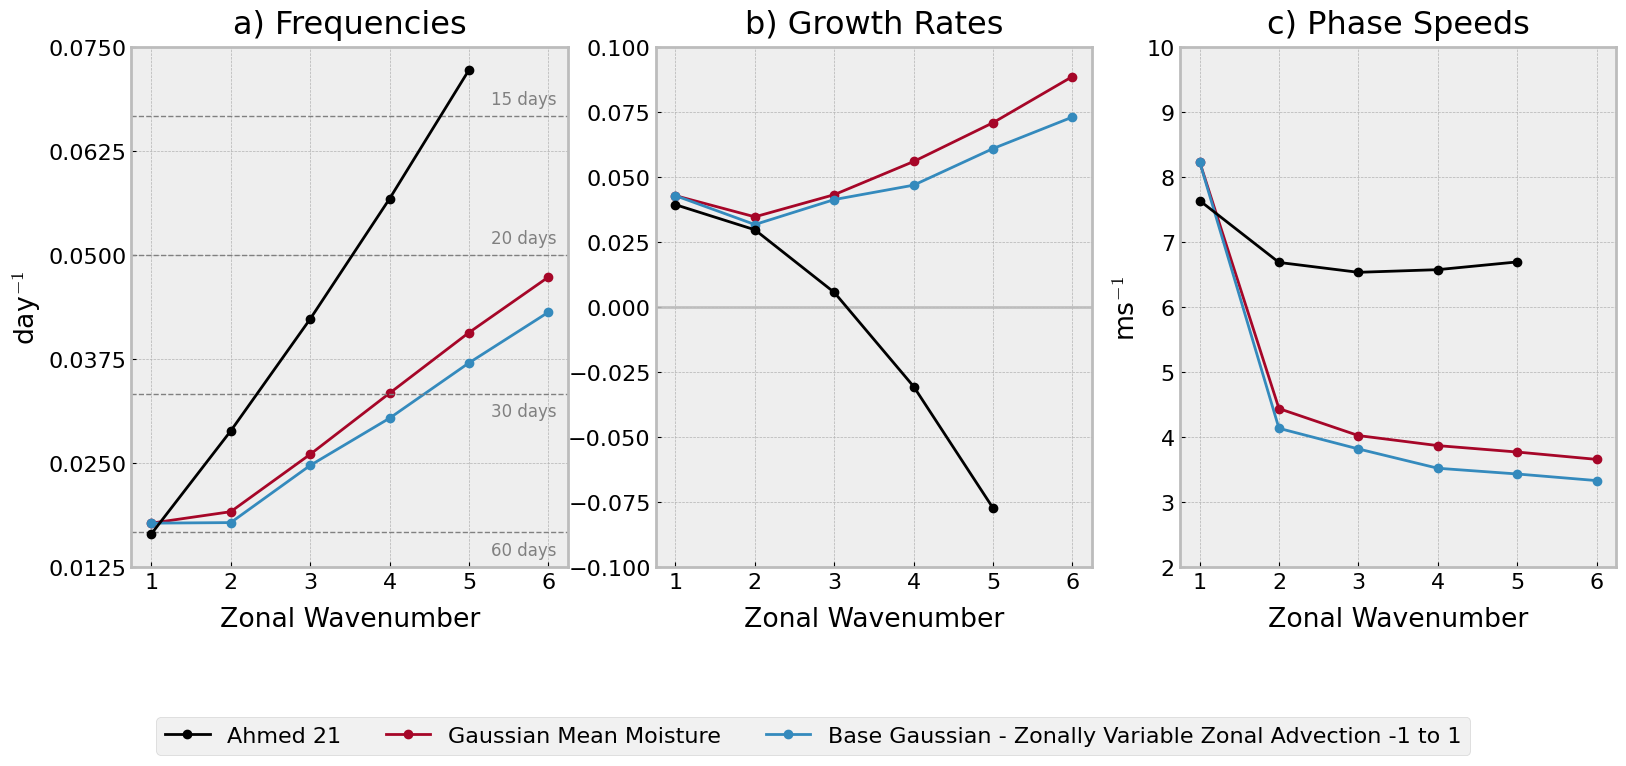

In [81]:
A21_frequencies = [0.103609/(2*np.pi), 0.181382/(2*np.pi), 0.265887/(2*np.pi), 0.356728/(2*np.pi), 0.453978/(2*np.pi)]
A21_growth_rates = 2*np.pi*np.array([ 0.00626967,  0.00473358,  0.00090043, -0.00486295, -0.01230747])

# Plot dispersion curves
starting_day = 359
ending_day = 360
starting_index = day_to_index(starting_day)
ending_index = day_to_index(ending_day)

plt.style.use('bmh')
plt.rcParams.update({'font.size':16})
# [fig, ax] = plt.subplots(1, 1, figsize=(11, 8.5))
fig = plt.figure(figsize=(16.5, 8))
gs_main = gs.GridSpec(1, 3, figure=fig)
gs_main.update(left=0.05, right=0.95, bottom=0.25, top=0.9, wspace=0.2)

ax = []
ax.append(fig.add_subplot(gs_main[0]))
ax.append(fig.add_subplot(gs_main[1]))
ax.append(fig.add_subplot(gs_main[2]))
# ax.append(fig.add_subplot(gs_main[3]))

#### Plot analytic A21 values
# Frequencies
ax[0].plot(
    [1,2,3,4,5],
    A21_frequencies,
    label='Ahmed 21',
    marker='o',
    color='black',
    zorder=10
)

# Growth rates
ax[1].plot(
    [1,2,3,4,5], 
    A21_growth_rates, 
    label='Ahmed 21', 
    marker='o', 
    color='black', 
    zorder=10
)

# Phase Speeds
ax[2].plot(
    [1,2,3,4,5], 
    2*np.pi*EARTH_RADIUS*np.array(A21_frequencies)/np.arange(1,6)/SECONDS_PER_DAY, 
    label='Ahmed 21', 
    marker='o', 
    color='black', 
    zorder=10
)

for exp_index, exp in enumerate(multi_experiment_phase_speeds['experiment'].values):
    calculated_frequency = []
    for wvnum_index, wvnum in enumerate(multi_experiment_phase_speeds['k'].values):
        calculated_frequency.append(
            np.mean(
                multi_experiment_phase_speeds.sel(experiment=exp, k=wvnum)[ending_index]
            )*(wvnum_index+1)/(2*np.pi*EARTH_RADIUS)
        )
    # calculated_frequency.append(phase_speeds[exp][t]*(index+1)/EARTH_RADIUS)

    ax[0].plot(
        np.array([1,2,3,4,5,6]),
        SECONDS_PER_DAY*np.array(calculated_frequency), 
        marker='o',
        label=exp,
        color=experiment_colors[exp]
    )

    ax[1].plot(
        np.array([1,2,3,4,5,6]),
        # SECONDS_PER_DAY*np.array(calculated_frequency), 
        SECONDS_PER_DAY*multi_experiment_growth_budgets['growth'].sel(experiment=exp).isel(time=day_to_index(ending_day)).values,
        marker='o',
        label=exp,
        color=experiment_colors[exp]
    )
    
    ax[2].plot(
        np.array([1,2,3,4,5,6]),
        # SECONDS_PER_DAY*np.array(calculated_frequency), 
        multi_experiment_phase_speeds.sel(experiment=exp).isel(time=day_to_index(ending_day)).values,
        marker='o',
        label=exp,
        color=experiment_colors[exp]
    )
    for axis in ['top','bottom','left','right']:
        ax[0].spines[axis].set_linewidth(2)
        ax[1].spines[axis].set_linewidth(2)
        ax[2].spines[axis].set_linewidth(2)

# Shared labels
for axis in [0,1,2]:
    ax[axis].set_xlabel('Zonal Wavenumber', labelpad=10)
    ax[axis].set_xticks(ticks=np.array([1,2,3,4,5,6]), labels=np.array([1,2,3,4,5,6]))
    ax[axis].set_aspect('auto')

# Configure plot 1 
frequency_ticks = np.arange(0, 0.0875, 0.0125)
ax[0].set_ylabel(r'day$^{-1}$')
ax[0].set_yticks(ticks=frequency_ticks)
# ax[0].legend(loc='upper left', fontsize=12)
ax[0].axhline(y=1/15, ls='--', color='gray', lw=1, alpha=1)
ax[0].text(x=6.1, y=(1/15)+0.001, s='15 days', fontsize=12, ha='right', va='bottom', color='gray')
ax[0].axhline(y=1/20, ls='--', color='gray', lw=1, alpha=1)
ax[0].text(x=6.1, y=(1/20)+0.001, s='20 days', fontsize=12, ha='right', va='bottom', color='gray')
ax[0].axhline(y=1/30, ls='--', color='gray', lw=1, alpha=1)
ax[0].text(x=6.1, y=(1/30)-0.001, s='30 days', fontsize=12, ha='right', va='top', color='gray')
ax[0].axhline(y=1/60, ls='--', color='gray', lw=1, alpha=1)
ax[0].text(x=6.1, y=(1/60)-0.001, s='60 days', fontsize=12, ha='right', va='top', color='gray')
ax[0].set_ylim(0.0125, 0.0750)

# Configure plot 2
ax[1].axhline(y=0, color='#bcbcbc', ls="-", alpha=0.9)
ax[1].set_ylim(-0.1, 0.1)

# Configure plot 3
ax[2].set_ylim(2, 10)
ax[2].set_ylabel(r'ms$^{-1}$')

# Label plots
ax[0].set_title('a) Frequencies', pad=10)
ax[1].set_title('b) Growth Rates', pad=10)
ax[2].set_title('c) Phase Speeds', pad=10)

handles, labels = ax[0].get_legend_handles_labels()
legend = fig.legend(handles, labels, ncol=3, loc='lower center', fontsize=16)

plt.show()
# plt.savefig(
#       f"output/Ahmed-21/multi-experiment_figures/Kelvin-wave_initial-condition"
#     + f"_multi-experiment_dispersion-curves-plot_days-{starting_day}-{ending_day}"
#     + (f"_{time.strftime('%Y%m%d-%H%M')}" if save_timestamp else '')
#     + f".png", 
#     bbox_inches='tight'
# )

## \<q\>-\<T\>-\<MSE\> slopes

### Calculate slopes

In [ ]:
day = 360

south_lat_index = np.abs(output_meridional_gridpoints/METERS_PER_DEGREE - 10).argmin()
north_lat_index = np.abs(output_meridional_gridpoints/METERS_PER_DEGREE - 15).argmin()

experiments_to_load = [
    # 'Base Case',
    'Gaussian Mean Moisture',
    'Variable Moisture Sensitivity',
    'No Temperature Sensitivity'
]

multi_experiment_moisture_slope = xr.DataArray(
    data=np.empty((len(experiments_to_load), 6, len(downsampled_timepoints))),
    dims=["experiment", "k", "time"],
    coords={
        "experiment" : experiments_to_load,
        "k" : [1,2,3,4,5,6],
        "time" : downsampled_timepoints
    },
    attrs = {
        "day" : day
    }
)
multi_experiment_temperature_slope = xr.DataArray(
    data=np.empty((len(experiments_to_load), 6, len(downsampled_timepoints))),
    dims=["experiment", "k", "time"],
    coords={
        "experiment" : experiments_to_load,
        "k" : [1,2,3,4,5,6],
        "time" : downsampled_timepoints
    },
    attrs = {
        "day" : day
    }
)

multi_experiment_max_value_ratio = xr.DataArray(
    data=np.empty((len(experiments_to_load), 6, len(downsampled_timepoints))),
    dims=["experiment", "k", "time"],
    coords={
        "experiment" : experiments_to_load,
        "k" : [1,2,3,4,5,6],
        "time" : downsampled_timepoints
    },
    attrs = {
        "day" : day
    }
)

for exp_index, experiment in enumerate(experiments_to_load):
    for k_index, k in enumerate([1,2,3,4,5,6]):
        specified_output_file_directory = f"output/Ahmed-21/{experiments_table[experiment]}"
        specified_initial_condition_name = f"k={k}.0_m=1_Kelvin-wave"
        initial_condition_type = specified_initial_condition_name.split('_')[-1]

        loaded_data = xr.load_dataset(
            f"{specified_output_file_directory}/Kelvin-wave_initial-condition/"
            + f"{specified_initial_condition_name}" 
            + f"_downsampled-model-data_compiled.nc"
        )

        multi_experiment_max_value_ratio[exp_index, k_index] = (loaded_data["q"].max(dim=["y", "x"])/loaded_data["T"].max(dim=["y", "x"])).values

        for day_index, day in enumerate(range(len(downsampled_timepoints))):
            loaded_moisture_data = loaded_data['q'].isel(y=slice(south_lat_index, north_lat_index), time = day_to_index(day)).values.flatten()
            loaded_temperature_data = loaded_data['T'].isel(y=slice(south_lat_index, north_lat_index), time = day_to_index(day)).values.flatten()
            column_MSE = loaded_moisture_data + loaded_temperature_data
    
            calculated_moisture_slope, calculated_moisture_intercept, _, _, _ = sp.stats.linregress(
                column_MSE,
                loaded_moisture_data
            )
    
            calculated_temperature_slope, calculated_temperature_intercept, _, _, _ = sp.stats.linregress(
                column_MSE,
                loaded_temperature_data
            )
            
            multi_experiment_moisture_slope[exp_index, k_index, day_index] = calculated_moisture_slope
            multi_experiment_temperature_slope[exp_index, k_index, day_index] = calculated_temperature_slope

print("done")

### Plot slopes as bar graphs

In [ ]:
# Label the bars 
bar_labels = experiments_to_load
bar_colors = [experiment_colors[experiment] for experiment in experiments_to_load]

day = 360

plt.style.use('bmh')
plt.rcParams.update({'font.size':18})
fig = plt.figure(figsize=(16, 10))
gs_main = gs.GridSpec(2, 1, figure=fig)
gs_main.update(left=0.05, right=0.95, bottom=0.05, top=0.875, hspace=0.2)

fig.suptitle(t=r"Slope of quantities vs. $\langle$MSE$\rangle$, day" +f" {day}, all latitudes", x=0.5, y=0.975)
ax = []
ax.append(fig.add_subplot(gs_main[0]))
ax.append(fig.add_subplot(gs_main[1]))

# width = 0.1375
width = 0.1175
multiplier = 0
x = np.arange(len(bar_labels))

bar_max = []
for k in multi_experiment_moisture_slope["k"]:
    bar_values = []
    offset = width * multiplier
    for experiment in experiments_to_load:
        bar_values.append(multi_experiment_moisture_slope.sel(experiment=experiment, k=k).isel(time=day_to_index(day)))
    bar_max.append(np.max(bar_values))
    
    rects = ax[0].bar(
        x + offset, 
        bar_values, 
        label = bar_labels, 
        color = bar_colors, 
        width = width,
        edgecolor='#bcbcbc', 
        linewidth=3,
        align='center'
    )    
    # ax.bar_label(rects, padding=0.3)
    multiplier += 1

for l in range(len(bar_labels)):
    ax[0].text(l, 1.22*np.max(bar_max), s=bar_labels[l])

ax[0].set_xticks(
    np.concatenate((x, x+offset/5, x+2*offset/5, x+3*offset/5, x+4*offset/5, x+offset)),
    sorted(np.arange(len(bar_labels)*6)%6+1)
)
# ax[0].set_xlabel('Zonal Wavenumber', labelpad=10)
ax[0].set_ylabel(r'$\langle$q$\rangle$', rotation=0, va='center', labelpad=25)
ax[0].set_ylim(0, 1)
ax[0].xaxis.grid(color='#bcbcbc', ls=':', lw=1, alpha=1)
ax[0].grid(False, axis='x')
ax[0].tick_params(axis='both', which='major', pad=7.5)

# width = 0.1375
width = 0.1175
multiplier = 0
x = np.arange(len(bar_labels))

bar_max = []
for k in multi_experiment_temperature_slope["k"]:
    offset = width * multiplier
    bar_values = []
    for experiment in experiments_to_load:
        bar_values.append(multi_experiment_temperature_slope.sel(experiment=experiment, k=k).isel(time=day_to_index(360)))
    bar_max.append(np.max(bar_values))
    
    rects = ax[1].bar(
        x + offset, 
        bar_values, 
        label = experiments_to_load[0], 
        color = bar_colors, 
        width = width,
        edgecolor='#bcbcbc', 
        linewidth=3,
        align='center'
    )    
    # ax.bar_label(rects, padding=0.3)
    multiplier += 1

# for l in range(len(bar_labels)):
#     ax[1].text(l, 1.2*np.max(bar_max), s=bar_labels[l])

ax[1].set_xticks(
    np.concatenate((x, x+offset/5, x+2*offset/5, x+3*offset/5, x+4*offset/5, x+offset)),
    sorted(np.arange(len(bar_labels)*6)%6+1)
)
ax[1].set_xlabel('Zonal Wavenumber', labelpad=10)
ax[1].set_ylabel(r'$\langle$T$\rangle$', rotation=0, va='center', labelpad=25)
ax[1].set_ylim(0, 1)
ax[1].xaxis.grid(color='#bcbcbc', ls=':', lw=1, alpha=1)
ax[1].grid(False, axis='x')
ax[1].tick_params(axis='y', which='major', pad=7.5, length=8, width=2, color='#bcbcbc')

for axis in ['top','bottom','left','right']:
    ax[0].spines[axis].set_linewidth(2)
    ax[1].spines[axis].set_linewidth(2)

plt.show()
# plt.savefig(
#       f"output/Ahmed-21/multi-experiment_figures/"
#     + f"{initial_condition_type}-initial-condition_multi-experiment_slopes"
#     + f"_{downsampled_timepoints[t]/SECONDS_PER_DAY:0.1f}-days"    
#     + (f"_{time.strftime('%Y%m%d-%H%M')}" if save_timestamp else '')
#     + f".png", 
#     bbox_inches='tight'
# )

## Plot epsq/epst ratio as bar graphs

In [ ]:
# Label the bars 
bar_labels = experiments_to_load
bar_colors = [experiment_colors[experiment] for experiment in experiments_to_load]

day = 360

plt.style.use('bmh')
plt.rcParams.update({'font.size':18})
fig = plt.figure(figsize=(16, 4))
gs_main = gs.GridSpec(1, 1, figure=fig)
gs_main.update(left=0.05, right=0.95, bottom=0.05, top=0.875)

# fig.suptitle(t=r"Slope of quantities vs. $\langle$MSE$\rangle$, day" +f" {day}, all latitudes", x=0.5, y=0.975)
ax = []
ax.append(fig.add_subplot(gs_main[0]))
# ax.append(fig.add_subplot(gs_main[1]))

# width = 0.1375
width = 0.1175
multiplier = 0
x = np.arange(len(bar_labels))

bar_max = []
for k in multi_experiment_max_value_ratio["k"]:
    bar_values = []
    offset = width * multiplier
    for experiment in experiments_to_load:
        bar_values.append(multi_experiment_max_value_ratio.sel(experiment=experiment, k=k).isel(time=day_to_index(day)))
    bar_max.append(np.max(bar_values))
    
    rects = ax[0].bar(
        x + offset, 
        bar_values, 
        label = bar_labels, 
        color = bar_colors, 
        width = width,
        edgecolor='#bcbcbc', 
        linewidth=3,
        align='center'
    )    
    # ax.bar_label(rects, padding=0.3)
    multiplier += 1

for l in range(len(bar_labels)):
    ax[0].text(l, 1.35*np.max(bar_max), s=bar_labels[l])

ax[0].set_xticks(
    np.concatenate((x, x+offset/5, x+2*offset/5, x+3*offset/5, x+4*offset/5, x+offset)),
    sorted(np.arange(len(bar_labels)*6)%6+1)
)
ax[0].set_xlabel('Zonal Wavenumber', labelpad=10)
# ax[0].set_ylabel(r'$\langle$q$\rangle$', rotation=0, va='center', labelpad=25)
ax[0].set_ylim(0, 6)
ax[0].xaxis.grid(color='#bcbcbc', ls=':', lw=1, alpha=1)
ax[0].grid(False, axis='x')
ax[0].tick_params(axis='both', which='major', pad=7.5)

for axis in ['top','bottom','left','right']:
    ax[0].spines[axis].set_linewidth(2)

ax[0].axhline(y = 3, color='red', alpha=0.5)
ax[0].set_ylabel(r'$\frac{max(\langle q \rangle)}{max(\langle T \rangle)}$', rotation=0, labelpad=55, fontsize=28)

plt.show()
# plt.savefig(
#       f"output/Ahmed-21/multi-experiment_figures/"
#     + f"{initial_condition_type}-initial-condition_multi-experiment_slopes"
#     + f"_{downsampled_timepoints[t]/SECONDS_PER_DAY:0.1f}-days"    
#     + (f"_{time.strftime('%Y%m%d-%H%M')}" if save_timestamp else '')
#     + f".png", 
#     bbox_inches='tight'
# )

In [ ]:
multi_experiment_max_value_ratio = xr.DataArray(
    data=np.empty((len(experiments_to_load), 6, len(downsampled_timepoints))),
    dims=["experiment", "k", "time"],
    coords={
        "experiment" : experiments_to_load,
        "k" : [1,2,3,4,5,6],
        "time" : downsampled_timepoints
    },
    attrs = {
        "day" : day
    }
)

for exp_index, experiment in enumerate(experiments_to_load):
    for k_index, k in enumerate([1,2,3,4,5,6]):
        specified_output_file_directory = f"output/Ahmed-21/{experiments_table[experiment]}"
        specified_initial_condition_name = f"k={k}.0_m=1_Kelvin-wave"
        initial_condition_type = specified_initial_condition_name.split('_')[-1]

        loaded_data = xr.load_dataset(
            f"{specified_output_file_directory}/Kelvin-wave_initial-condition/"
            + f"{specified_initial_condition_name}" 
            + f"_downsampled-model-data_compiled.nc"
        )

        multi_experiment_max_value_ratio[exp_index, k_index] = (loaded_data["q"].max(dim=["y", "x"])/loaded_data["T"].max(dim=["y", "x"])).values

    print(loaded_data["q"][day_to_index(360)].max(dim=["y", "x"]).values)
    print(loaded_data["T"][day_to_index(360)].max(dim=["y", "x"]).values)


# Mode Number

## Calculate mode number

In [53]:
moisture_adjustment_timescale = 1/MOISTURE_SENSITIVITY

A21_frequencies = np.array([0.103609, 0.181382, 0.265887, 0.356728, 0.453978])
A21_wave_timescale = 2*np.pi/(A21_frequencies/SECONDS_PER_DAY)

A21_gravity_wave_timescale = np.empty((5))
for k in [1,2,3,4,5]:
    A21_gravity_wave_timescale[k-1] = (2*np.pi*EARTH_RADIUS/k)/gravity_wave_phase_speed

A21_mode_number = A21_gravity_wave_timescale**2/(moisture_adjustment_timescale*A21_wave_timescale)


multi_experiment_mode_number = xr.DataArray(
    None, 
    coords=dict(
        experiment=experiments_to_load,
        k=[1,2,3,4,5,6], 
    ), 
    dims=("experiment", "k")
)

starting_index = day_to_index(250)
ending_index = day_to_index(360)

print(f"{'':{'='}^{50}}")
print(f"Calculate Mode Number")
print(f"{'':{'='}^{50}}")
for experiment_index, experiment in enumerate(experiments_to_load):
    print(f"---- Experiment: {experiment}")
    for k_index, k in enumerate([1,2,3,4,5,6]):    
        # Estimate the gravity wave adjustment timescale
        gravity_wave_timescale = (2*np.pi*EARTH_RADIUS/k)/gravity_wave_phase_speed
    
        # Estimate the timescale of the wave
        wave_timescale = 1/(np.mean(
            multi_experiment_phase_speeds.sel(experiment=experiment, k=k)[starting_index:ending_index]
        )*k/(2*np.pi*EARTH_RADIUS))

        multi_experiment_mode_number[experiment_index, k_index] = gravity_wave_timescale**2/(moisture_adjustment_timescale*wave_timescale)

print(f"Mode Number Calculated")
print(f"{'':{'='}^{50}}")

Calculate Mode Number
---- Experiment: Gaussian Mean Moisture
---- Experiment: Asymmetric Gaussian Mean Moisture
Mode Number Calculated


## Plot mode number

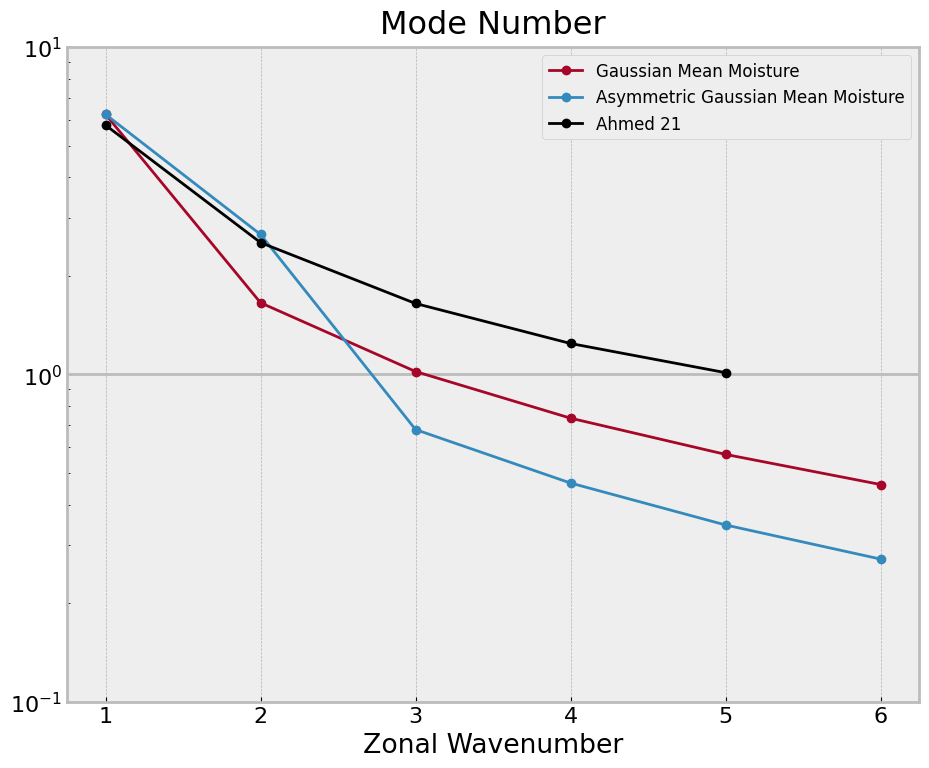

In [54]:
plt.style.use('bmh')
plt.rcParams.update({'font.size':16})
[fig, ax] = plt.subplots(1, 1, figsize=(11, 8.5))

ax.set_title("Mode Number", pad=10)
ax.axhline(y=1, color='#bcbcbc', alpha=1)
for exp_index, exp in enumerate(multi_experiment_phase_speeds['experiment'].values):
            
    ax.plot(
        np.array([1,2,3,4,5,6]),
        multi_experiment_mode_number.sel(experiment=exp).values, 
        marker='o',
        label=exp,
        color=experiment_colors[exp]
    )

ax.plot([1,2,3,4,5], A21_mode_number, label='Ahmed 21', marker='o', color='black')

ax.set_xlabel('Zonal Wavenumber')
ax.set_xticks(ticks=np.array([1,2,3,4,5,6]), labels=np.array([1,2,3,4,5,6]))
# ax.set_ylim(0, 15)
ax.set_yscale('log')
ax.set_yticks([0.1, 1, 10])
ax.legend(loc='upper right', fontsize=12, facecolor='#eeeeee', framealpha=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
plt.show()